1. **[Univariate Analysis](#Univariate_Analysis)**

2. **[Multivariate Analysis](#Multivariate_Analysis)**

3. **[Encoding](#Encoding)**

4. **[Hypothesis Testing](#Hypothesis_Testing)**

5. **[Data Preparation For Model Building](#Data_Prep)**

6. **[Model Building](#Model_Building)**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',50)
plt.rcParams["figure.figsize"]=(20,10)

### Data Understanding

In [2]:
df=pd.read_csv("Main Dump (Cleaned_Dataset)_Main Dump.csv")

In [3]:
df.head()

,C_APPLICATION_NO,C_CDA_DATE,C_COLL_DATE_OPUS_DATE,C_PERM_RECEIPT_NO,C_POLICY_HOLDER,C_PRODUCT_CODE,C_TRANSACTION_TYPE,CHANGE_DESCRIPTION,Cleaned Policy Holder,Filled Insured Person,FREQUENCY,INSURED_PERSON,Issuance,issued_date,Issuence Finacial Yr.,Login,Login Finacial Yr.,login_Date,New RH/SRH,New RH/SRH Code,Office_Cat,POLICY HOLDER,Policy_ref,product_name,Region,SISO Flag,Tagging for Raking Issuance,Tagging for Raking Login,UPPER POLICY HOLDER,benefit_term,BOOKING_FREQUENCY,Calculation2,Calculation3,Issued_Premium,Issued_RNB,NOPs,Premium,premium_term,RNB
0,6103758554,NaN,26-04-2020,823540902,MR OBULIRAJ R,319,FRP,ISSUED,NaN,OBULIRAJ R,RP,OBULIRAJ R,Issued,30-04-2020,20-21,Login,20-21,26-04-2020,MOHAMED ERSHAD,14RP000021,POSP,OBULIRAJ R,397330367,Guarantee Income Goal,South,0,No,No,MR OBULIRAJ R,12,1.0,10.0,10.0,50003.53,52503.7065,1,52254.0,12,50003.83
1,6103758490,NaN,26-04-2020,823540935,MR YUGAL KISHOR GARG,321,FRP,ISSUED,NaN,YUGAL KISHOR GARG,RP,YUGAL KISHOR GARG,Issued,26-05-2020,20-21,Login,20-21,26-04-2020,JAGJIT SINGH,14RP001924,RP,YUGAL KISHOR GARG,397330215,Life Smart Protect Goal,North,0,No,No,MR YUGAL KISHOR GARG,42,1.0,17.0,17.0,86829.00,86829.0000,1,102458.0,10,86828.78
2,6103761312,NaN,28-04-2020,824128777,MR M S GANESH,309,FRP,RI,NaN,M S GANESH,RP,M S GANESH,Issued,28-04-2020,20-21,Login,20-21,28-04-2020,MOHAMED ERSHAD,14RP000021,RP,M S GANESH,397733820,Life Pos Goal Suraksha,South,0,No,No,MR M S GANESH,10,1.0,10.0,10.0,60000.00,60000.0000,1,62700.0,7,60000.00
3,6103762775,NaN,30-04-2020,824556925,MRS ASHA MURALIKRISHNAN,309,FRP,RI,NaN,ASHA MURALIKRISHNAN,RP,ASHA MURALIKRISHNAN,Issued,30-04-2020,20-21,Login,20-21,30-04-2020,MOHAMED ERSHAD,14RP000021,RP,ASHA MURALIKRISHNAN,397832387,Life Pos Goal Suraksha,South,0,No,No,MRS ASHA MURALIKRISHNAN,10,1.0,19.0,19.0,60000.00,60000.0000,1,62700.0,7,60000.00
4,6103765169,NaN,30-04-2020,824577643,MR SRIEE NATARAJAN M,319,FRP,ISSUED,NaN,VIJAYALAKSHMI .,RP,VIJAYALAKSHMI .,Issued,05-05-2020,20-21,Login,20-21,30-04-2020,MOHAMED ERSHAD,14RP000021,RP,SRIEE NATARAJAN M,397881568,Guarantee Income Goal,South,0,No,No,MR SRIEE NATARAJAN M,10,1.0,17.0,17.0,60005.00,63005.2500,1,62705.0,10,60004.78


In [4]:
df.shape

(21170, 39)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21170 entries, 0 to 21169
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   C_APPLICATION_NO             21170 non-null  int64  
 1   C_CDA_DATE                   9988 non-null   object 
 2   C_COLL_DATE_OPUS_DATE        21170 non-null  object 
 3   C_PERM_RECEIPT_NO            21170 non-null  int64  
 4   C_POLICY_HOLDER              20931 non-null  object 
 5   C_PRODUCT_CODE               21170 non-null  int64  
 6   C_TRANSACTION_TYPE           21170 non-null  object 
 7   CHANGE_DESCRIPTION           21170 non-null  object 
 8   Cleaned Policy Holder        6 non-null      object 
 9   Filled Insured Person        20587 non-null  object 
 10  FREQUENCY                    21170 non-null  object 
 11  INSURED_PERSON               20621 non-null  object 
 12  Issuance                     21170 non-null  object 
 13  issued_date     

<hr>

### Filtering Data

In [6]:
df_new=df[(df["Region"]!=0)]

* We are removing Region 0 because all the data associated with Region 0 does not make sense.

In [7]:
# Importing Libraries
from datetime import datetime
date_list_cols=["C_COLL_DATE_OPUS_DATE","issued_date","login_Date","C_CDA_DATE"]

In [8]:
def date_func(l):
    for i in l:
        df_new[i]=list(map(lambda x:np.nan if str(x)=="nan" else datetime.strptime(x,"%d-%m-%Y"),df_new[i]))

In [9]:
date_func(date_list_cols)

We are only taking data of 7 business quarters, as spoke with the stakeholders

In [10]:
df_new=df_new[(df_new["issued_date"]>="2021-01-01")&(df_new["issued_date"]<="2022-09-30")]

In [11]:
df_new["C_TRANSACTION_TYPE"].unique()

array(['FRP', 'APR', 'RWP'], dtype=object)

<hr>

### Removing Redudant Columns

In [12]:
df_new.drop(["Calculation3","Calculation2","Issued_Premium","Premium","RNB",
             "UPPER POLICY HOLDER","Filled Insured Person","Cleaned Policy Holder",
             "Issuence Finacial Yr.","Login Finacial Yr."],axis=1,inplace=True)

The above columns are redudant and has no useful information therefore we are removing

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16890 entries, 271 to 20797
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   C_APPLICATION_NO             16890 non-null  int64         
 1   C_CDA_DATE                   7109 non-null   datetime64[ns]
 2   C_COLL_DATE_OPUS_DATE        16890 non-null  datetime64[ns]
 3   C_PERM_RECEIPT_NO            16890 non-null  int64         
 4   C_POLICY_HOLDER              16884 non-null  object        
 5   C_PRODUCT_CODE               16890 non-null  int64         
 6   C_TRANSACTION_TYPE           16890 non-null  object        
 7   CHANGE_DESCRIPTION           16890 non-null  object        
 8   FREQUENCY                    16890 non-null  object        
 9   INSURED_PERSON               16491 non-null  object        
 10  Issuance                     16890 non-null  object        
 11  issued_date                  16890 non-

In [14]:
df_new.drop("New RH/SRH Code",axis=1,inplace=True)

Removed RH/SRH Code because we only need the names has of now and all the names are unique

In [15]:
df_new.drop("C_POLICY_HOLDER",axis=1,inplace=True)

Removed the above column because we have cleaned policy holder column

Removing the Transaction Type because in the filtered data there is only one type of transaction

Removing the Transaction Type because in the filtered data there is only one type of frequency

<hr>

### Grouping Certain Values

In [16]:
df_new["SISO Flag"]=df_new["SISO Flag"].map({"0":0,"N":0,"Y":1})

In [17]:
df_new["SISO Flag"].unique()

array([0, 1], dtype=int64)

In [18]:
df_new["Login"]=df_new["Login"].replace({"Login":1,"0":0})
df_new["Tagging for Raking Issuance"]=df_new["Tagging for Raking Issuance"].replace({"No":0,"Yes":1})
df_new["Tagging for Raking Login"]=df_new["Tagging for Raking Login"].replace({"No":0,"Yes":1})
df_new["Issuance"]=df_new["Issuance"].replace({"Issued":1,"0":0})
df_new["Issue_Quarter"]=df_new["issued_date"].dt.quarter
df_new["Issue_Year"]=df_new["issued_date"].dt.year
df_new["Issue_Day"]=df_new["issued_date"].dt.day

In [19]:
df_new["Login_Quarter"]=df_new["login_Date"].dt.quarter
df_new["Login_Year"]=df_new["login_Date"].dt.year
df_new["Login_Day"]=df_new["login_Date"].dt.day

In [20]:
df_new["CDA_Quarter"]=df_new["C_CDA_DATE"].dt.quarter
df_new["CDA_Year"]=df_new["C_CDA_DATE"].dt.year
df_new["CDA_Day"]=df_new["C_CDA_DATE"].dt.day

<hr>

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16890 entries, 271 to 20797
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   C_APPLICATION_NO             16890 non-null  int64         
 1   C_CDA_DATE                   7109 non-null   datetime64[ns]
 2   C_COLL_DATE_OPUS_DATE        16890 non-null  datetime64[ns]
 3   C_PERM_RECEIPT_NO            16890 non-null  int64         
 4   C_PRODUCT_CODE               16890 non-null  int64         
 5   C_TRANSACTION_TYPE           16890 non-null  object        
 6   CHANGE_DESCRIPTION           16890 non-null  object        
 7   FREQUENCY                    16890 non-null  object        
 8   INSURED_PERSON               16491 non-null  object        
 9   Issuance                     16890 non-null  int64         
 10  issued_date                  16890 non-null  datetime64[ns]
 11  Login                        16890 non-

<hr>

#### Cleaning Issued RNB

In [22]:
df_new["Issued_RNB"]=np.abs(df_new["Issued_RNB"])

<hr>

In [23]:
df_new["CHANGE_DESCRIPTION"]=df_new["CHANGE_DESCRIPTION"].str.upper()
df_new["Lapse or not"]=list(map(lambda x:1 if x=="LAPSE" else 0,df_new["CHANGE_DESCRIPTION"]))

### Describing Data

In [24]:
df_new["SISO Flag"].value_counts()

0    16751
1      139
Name: SISO Flag, dtype: int64

In [25]:
df_new[df_new["SISO Flag"]==1].describe(include=object)

,C_TRANSACTION_TYPE,CHANGE_DESCRIPTION,FREQUENCY,INSURED_PERSON,New RH/SRH,Office_Cat,POLICY HOLDER,product_name,Region
count,139,139,139,139,139,139,139,139,139
unique,3,3,1,52,6,2,48,2,6
top,RWP,ISSUED,RP,JIGNESH INDRAVADAN SHAH,SANJEEV KUMAR SRIVASTAVA,IC,JIGNESH INDRAVADAN SHAH,Life Assured Wealth Goal,ROMG
freq,85,126,139,6,71,93,6,120,71


* SISO Flag description - 139 Rows

    * Most of the transaction type is of RWP
    * Most of the policy are ISSUED
    * All frequecy is RP (We can drop Frequency)
    * New RH/SRH - SANJEEV KUMAR SRIVASTAVA
    * Office_Cat - IC
    * Product_Name - Life Assured Wealth Goal
    * Region - ROMG

In [26]:
df_new[df_new["SISO Flag"]==1].describe()

,C_APPLICATION_NO,C_PERM_RECEIPT_NO,C_PRODUCT_CODE,Issuance,Login,Policy_ref,SISO Flag,Tagging for Raking Issuance,Tagging for Raking Login,benefit_term,BOOKING_FREQUENCY,Issued_RNB,NOPs,premium_term,Issue_Quarter,Issue_Year,Issue_Day,Login_Quarter,Login_Year,Login_Day,CDA_Quarter,CDA_Year,CDA_Day,Lapse or not
count,1.390000e+02,1.390000e+02,139.000000,139.0,139.0,1.390000e+02,139.0,139.0,139.000000,139.000000,139.0,139.000000,139.000000,139.000000,139.000000,139.0,139.000000,139.000000,139.0,139.000000,139.0,139.0,139.0,139.000000
mean,6.120807e+09,1.050227e+09,341.906475,1.0,1.0,5.216642e+08,1.0,0.0,0.071942,35.805755,12.0,9319.014245,0.381295,10.021583,2.956835,2022.0,16.028777,3.258993,2022.0,15.712230,4.0,1899.0,30.0,0.071942
std,2.309372e+06,1.081051e+07,2.758103,0.0,0.0,2.558482e+06,0.0,0.0,0.259327,11.364117,0.0,11352.416009,0.487461,2.134831,0.203964,0.0,10.229215,0.471478,0.0,10.354054,0.0,0.0,0.0,0.259327
min,6.109974e+09,1.026426e+09,335.000000,1.0,1.0,5.136454e+08,1.0,0.0,0.000000,10.000000,12.0,0.000000,0.000000,5.000000,2.000000,2022.0,1.000000,2.000000,2022.0,1.000000,4.0,1899.0,30.0,0.000000
25%,6.121273e+09,1.041948e+09,343.000000,1.0,1.0,5.204968e+08,1.0,0.0,0.000000,33.000000,12.0,5000.000000,0.000000,10.000000,3.000000,2022.0,5.000000,3.000000,2022.0,5.000000,4.0,1899.0,30.0,0.000000
50%,6.121292e+09,1.051130e+09,343.000000,1.0,1.0,5.218231e+08,1.0,0.0,0.000000,42.000000,12.0,5000.000000,0.000000,10.000000,3.000000,2022.0,16.000000,3.000000,2022.0,16.000000,4.0,1899.0,30.0,0.000000
75%,6.121301e+09,1.059485e+09,343.000000,1.0,1.0,5.224186e+08,1.0,0.0,0.000000,44.000000,12.0,6001.000000,1.000000,12.000000,3.000000,2022.0,28.000000,4.000000,2022.0,28.000000,4.0,1899.0,30.0,0.000000
max,6.121403e+09,1.067729e+09,343.000000,1.0,1.0,5.293599e+08,1.0,0.0,1.000000,56.000000,12.0,50000.000000,1.000000,12.000000,3.000000,2022.0,31.000000,4.000000,2022.0,31.000000,4.0,1899.0,30.0,1.000000


<hr>

In [27]:
df_new["Lapse or not"].value_counts()

0    16049
1      841
Name: Lapse or not, dtype: int64

In [28]:
df_new[df_new["Lapse or not"]==1].describe(include=object)

,C_TRANSACTION_TYPE,CHANGE_DESCRIPTION,FREQUENCY,INSURED_PERSON,New RH/SRH,Office_Cat,POLICY HOLDER,product_name,Region
count,841,841,841,826,841,841,841,841,841
unique,3,1,1,680,7,4,691,13,8
top,FRP,LAPSE,RP,-,MOHAMED ERSHAD,RP,BHAVIKA M PARMAR,Bajaj Allianz Life Guaranteed Income Goal,South
freq,741,841,841,44,307,468,11,273,307


* Lapse or not description - 841 Rows

    * Most of the transaction type is of FRP
    * Most of the policy are LAPSE (We can remove Change_description)
    * All frequecy is RP (We can drop Frequency)
    * New RH/SRH - MOHAMED ERSHAD	
    * Office_Cat - RP
    * Product_Name - Bajaj Allianz Life Guaranteed Income Goal
    * Region - South

In [29]:
df_new[df_new["Lapse or not"]==1].describe()

,C_APPLICATION_NO,C_PERM_RECEIPT_NO,C_PRODUCT_CODE,Issuance,Login,Policy_ref,SISO Flag,Tagging for Raking Issuance,Tagging for Raking Login,benefit_term,BOOKING_FREQUENCY,Issued_RNB,NOPs,premium_term,Issue_Quarter,Issue_Year,Issue_Day,Login_Quarter,Login_Year,Login_Day,CDA_Quarter,CDA_Year,CDA_Day,Lapse or not
count,8.410000e+02,8.410000e+02,841.000000,841.0,841.0,8.410000e+02,841.000000,841.0,841.0,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,65.0,65.0,65.0,841.0
mean,6.109347e+09,9.446579e+08,316.971463,1.0,1.0,4.671090e+08,0.011891,0.0,0.0,23.570749,2.669441,45065.054050,0.881094,11.749108,2.468490,2021.126040,17.775268,2.443520,2021.140309,17.796671,4.0,1899.0,30.0,1.0
std,1.964398e+06,3.605855e+07,16.119174,0.0,0.0,1.755259e+07,0.108458,0.0,0.0,13.223178,3.637127,56026.110481,0.323871,4.745933,0.868369,0.332092,9.132525,0.888797,0.360957,9.061708,0.0,0.0,0.0,0.0
min,6.103797e+09,8.689170e+08,241.000000,1.0,1.0,3.998482e+08,0.000000,0.0,0.0,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,2021.000000,1.000000,1.000000,2020.000000,1.000000,4.0,1899.0,30.0,1.0
25%,6.109250e+09,9.232206e+08,309.000000,1.0,1.0,4.581666e+08,0.000000,0.0,0.0,15.000000,1.000000,14400.000000,1.000000,10.000000,2.000000,2021.000000,10.000000,2.000000,2021.000000,11.000000,4.0,1899.0,30.0,1.0
50%,6.109392e+09,9.448272e+08,319.000000,1.0,1.0,4.682822e+08,0.000000,0.0,0.0,20.000000,1.000000,30000.060000,1.000000,12.000000,3.000000,2021.000000,18.000000,3.000000,2021.000000,19.000000,4.0,1899.0,30.0,1.0
75%,6.109471e+09,9.571347e+08,329.000000,1.0,1.0,4.754865e+08,0.000000,0.0,0.0,24.000000,2.000000,50021.000000,1.000000,12.000000,3.000000,2021.000000,26.000000,3.000000,2021.000000,26.000000,4.0,1899.0,30.0,1.0
max,6.121392e+09,1.057506e+09,343.000000,1.0,1.0,5.284867e+08,1.000000,0.0,0.0,85.000000,12.000000,620555.060000,1.000000,58.000000,4.000000,2022.000000,31.000000,4.000000,2022.000000,31.000000,4.0,1899.0,30.0,1.0


<hr>

### New Features

* Latest Collected Date
* Days Diff
* Product Cat
* Top 5 features
* CDA yes no


#### Creating Latest Collected Date

In [30]:
latest_date_nomral_max=df_new.groupby("Policy_ref")["C_COLL_DATE_OPUS_DATE"].max().reset_index()
latest_date_nomral_max

,Policy_ref,C_COLL_DATE_OPUS_DATE
0,399848220,2021-02-27
1,400117764,2022-06-30
2,400279984,2021-02-01
3,401506722,2021-03-30
4,401625368,2021-03-23
...,...,...
15127,530068716,2022-09-30
15128,530069784,2022-09-30
15129,530076422,2022-09-30
15130,530093011,2022-09-30


In [31]:
latest_date_nomral_max.set_index("Policy_ref",inplace=True)

In [32]:
max_date_dict=latest_date_nomral_max.to_dict()

In [33]:
df_new["Latest_Collected_Date"]=df_new["Policy_ref"].map(max_date_dict["C_COLL_DATE_OPUS_DATE"])

#### Dropping Collected Date

In [34]:
df_new=df_new.drop("C_COLL_DATE_OPUS_DATE",axis=1)

<hr>

#### Days Diff

In [35]:
df_new["Days take to issue"]=df_new["issued_date"]-df_new["Latest_Collected_Date"]

In [36]:
df_new[["Latest_Collected_Date","issued_date","Days take to issue"]]

,Latest_Collected_Date,issued_date,Days take to issue
271,2021-03-31,2021-07-30,121 days
724,2020-11-03,2021-01-05,63 days
739,2020-11-06,2021-03-30,144 days
914,2020-12-14,2021-01-14,31 days
935,2020-12-15,2021-01-18,34 days
...,...,...,...
20793,2022-11-04,2022-09-03,-62 days
20794,2022-11-08,2022-09-08,-61 days
20795,2022-11-04,2022-09-03,-62 days
20796,2022-11-07,2022-09-06,-62 days


In [37]:
df_new["Collected_Quarter"]=df_new["Latest_Collected_Date"].dt.quarter
df_new["Collected_Year"]=df_new["Latest_Collected_Date"].dt.year
df_new["Collected_Day"]=df_new["Latest_Collected_Date"].dt.day

<hr>

#### Product Cat

In [38]:
P=['Cash Assure','CASH ASSURE','Elite Assure','Invest Assure','Life Flexi Income Goal','Life Flexi Income Goal'
  ,'Life Income Assure','Life Longlife Goal']
ULIP=['FUTURE WEALTH GAIN','FUTURE GAIN','Life Secure']
NP=['Guarantee Income Goal','Life Assured Wealth Goal', 'Life Guaranteed Pension Goal'
    ,'Life Pos Goal Suraksha','Lifelong Assure','YOUNG ASSURE','Young Assure','Superlife Assure']
Pure_life_ins=['Life Saral Jeevan Bima','Life Smart Protect Goal']
Health_ins=[ 'Life Health Care Goal']

In [39]:
def product_cat(x):
    if x in P:
        return "P"
    elif x in ULIP:
        return "ULIP"
    elif x in NP:
        return "NP"
    elif x in Pure_life_ins:
        return "Pure Life Insurance"
    elif x in Health_ins:
        return "Health Insurance"
    else:
        return "Unk"

In [40]:
df_new["product_cat"]=df_new["product_name"].apply(product_cat)
df_new["product_cat"].unique()

array(['NP', 'Pure Life Insurance', 'P', 'Unk', 'Health Insurance',
       'ULIP'], dtype=object)

#### Top 5 Features group

In [41]:
df_new.groupby("product_name")["NOPs"].sum().sort_values(ascending=False)

product_name
Bajaj Allianz Life Guaranteed Income Goal    3789
Life Flexi Income Goal                       3511
Life Smart Protect Goal                      2451
Life Assured Wealth Goal                     2370
Life Pos Goal Suraksha                       1892
Life Guaranteed Pension Goal                  545
Guarantee Income Goal                         230
Lifelong Assure                                94
Life Income Assure                             75
Cash Assure                                    65
Elite Assure                                   45
Life Saral Jeevan Bima                         23
Young Assure                                    8
Invest Assure                                   6
Life Longlife Goal                              2
CASH ASSURE                                     2
FUTURE GAIN                                     2
Life Secure                                     1
FUTURE WEALTH GAIN                              1
Superlife Assure                     

In [42]:
df_new["Top 5 Products Group"]=list(map(lambda x:"Top 5 Products" 
         if (x=="Life Flexi Income Goal")or(x=="Bajaj Allianz Life Guaranteed Income Goal")
                                        or(x=="Life Smart Protect Goal")or(x=="Life Assured Wealth Goal")
                                        or(x=="Life Pos Goal Suraksha") else "Others" ,df_new["product_name"]))

In [43]:
df_new[["product_name","Top 5 Products Group"]].head()

,product_name,Top 5 Products Group
271,Life Pos Goal Suraksha,Top 5 Products
724,Life Smart Protect Goal,Top 5 Products
739,Life Smart Protect Goal,Top 5 Products
914,Life Smart Protect Goal,Top 5 Products
935,Life Smart Protect Goal,Top 5 Products


#### CDA 

In [44]:
df_new["CDA_yes_no"]=df_new["CDA_Year"].replace({np.nan:0,1899:0,2021:1,2022:1})

In [45]:
df_new["CDA_yes_no"].unique()

array([0., 1.])

<hr>

In [46]:
df_new.columns

Index(['C_APPLICATION_NO', 'C_CDA_DATE', 'C_PERM_RECEIPT_NO', 'C_PRODUCT_CODE',
       'C_TRANSACTION_TYPE', 'CHANGE_DESCRIPTION', 'FREQUENCY',
       'INSURED_PERSON', 'Issuance', 'issued_date', 'Login', 'login_Date',
       'New RH/SRH', 'Office_Cat', 'POLICY HOLDER', 'Policy_ref',
       'product_name', 'Region', 'SISO Flag', 'Tagging for Raking Issuance',
       'Tagging for Raking Login', 'benefit_term', 'BOOKING_FREQUENCY',
       'Issued_RNB', 'NOPs', 'premium_term', 'Issue_Quarter', 'Issue_Year',
       'Issue_Day', 'Login_Quarter', 'Login_Year', 'Login_Day', 'CDA_Quarter',
       'CDA_Year', 'CDA_Day', 'Lapse or not', 'Latest_Collected_Date',
       'Days take to issue', 'Collected_Quarter', 'Collected_Year',
       'Collected_Day', 'product_cat', 'Top 5 Products Group', 'CDA_yes_no'],
      dtype='object')

In [47]:
df_new.shape

(16890, 44)

In [48]:
df_new.premium_term.unique()

array([12, 10, 38,  5, 63, 20, 15, 30, 14,  8,  0,  7, 11, 53, 31, 47, 54,
       36, 40, 42, 51, 35, 24, 46, 43, 25, 34, 61,  1, 16, 22, 37, 19,  6,
       41, 26, 44, 55, 58, 28, 45, 33, 49, 52, 21, 17, 18, 32, 39, 48, 50,
       60, 56, 23, 57, 29, 59, 64, 27, 66, 68, 65,  9, 13, 62],
      dtype=int64)

In [49]:
df_new.BOOKING_FREQUENCY.unique()

array([ 2.,  1.,  0., 12.,  4.])

In [50]:
df_new.benefit_term.unique()

array([15, 32, 38, 41, 25, 63, 22, 58, 46, 54, 33, 24, 40, 48, 12, 60, 37,
       26, 44, 20, 14, 35, 47, 80,  0, 27, 36, 52, 68, 49,  5, 16, 75, 61,
       50, 53, 51, 31, 39, 10, 30,  7, 57, 42, 19, 56, 28, 67, 34, 17, 43,
       45, 23, 55, 78, 29, 18, 79, 66, 62, 69, 21, 11, 73, 74, 59, 65, 72,
       64, 71, 70, 84, 76,  8, 13, 77, 83, 86, 88, 85, 89, 90, 87],
      dtype=int64)

In [51]:
pd.crosstab(df_new["New RH/SRH"],df_new["Region"])

Region,AP&TS,East,Gujarat,MPCG,Mumbai,North,Pune,ROMG,South,UP
New RH/SRH,,,,,,,,,,
JAGJIT SINGH,0,0,0,0,0,1435,0,0,0,0
MOHAMED ERSHAD,1,0,0,0,0,0,0,0,3423,0
PARUL MATHUR,0,0,0,0,235,0,0,0,0,0
PRADYUMNA VERMA,0,0,0,0,0,0,0,0,0,635
SANDIP KUMAR AICH,0,3732,0,0,0,0,0,0,0,0
SANJEEV KUMAR SRIVASTAVA,0,0,0,0,0,0,50,2600,0,0
THAKKAR VIMALKUMAR,0,0,3913,866,0,0,0,0,0,0


In [52]:
df_new["Region"]=df_new["Region"].replace({"Pune":"ROMG","Gujarat":"MPCG","AP&TS":"South"})

In [53]:
pd.crosstab(df_new["New RH/SRH"],df_new["Region"])

Region,East,MPCG,Mumbai,North,ROMG,South,UP
New RH/SRH,,,,,,,
JAGJIT SINGH,0,0,0,1435,0,0,0
MOHAMED ERSHAD,0,0,0,0,0,3424,0
PARUL MATHUR,0,0,235,0,0,0,0
PRADYUMNA VERMA,0,0,0,0,0,0,635
SANDIP KUMAR AICH,3732,0,0,0,0,0,0
SANJEEV KUMAR SRIVASTAVA,0,0,0,0,2650,0,0
THAKKAR VIMALKUMAR,0,4779,0,0,0,0,0


<hr>

### Describing Data

In [54]:
df_new[df_new["SISO Flag"]==1].describe(include=object)

,C_TRANSACTION_TYPE,CHANGE_DESCRIPTION,FREQUENCY,INSURED_PERSON,New RH/SRH,Office_Cat,POLICY HOLDER,product_name,Region,product_cat,Top 5 Products Group
count,139,139,139,139,139,139,139,139,139,139,139
unique,3,3,1,52,6,2,48,2,6,1,2
top,RWP,ISSUED,RP,JIGNESH INDRAVADAN SHAH,SANJEEV KUMAR SRIVASTAVA,IC,JIGNESH INDRAVADAN SHAH,Life Assured Wealth Goal,ROMG,NP,Top 5 Products
freq,85,126,139,6,71,93,6,120,71,139,120


* SISO Flag description - 139 Rows

    * Most of the transaction type is of RWP
    * Most of the policy are ISSUED
    * All frequecy is RP (We can drop Frequency)
    * New RH/SRH - SANJEEV KUMAR SRIVASTAVA
    * Office_Cat - IC
    * Product_Name - Life Assured Wealth Goal
    * Region - ROMG
    * Product Cat - All the SISO Flag Comes from NP Cat (We can remove product as we have the categories)
    * Top 5 Products contribute most in lapse or not


In [55]:
df_new[df_new["Lapse or not"]==1].describe(include=object)

,C_TRANSACTION_TYPE,CHANGE_DESCRIPTION,FREQUENCY,INSURED_PERSON,New RH/SRH,Office_Cat,POLICY HOLDER,product_name,Region,product_cat,Top 5 Products Group
count,841,841,841,826,841,841,841,841,841,841,841
unique,3,1,1,680,7,4,691,13,7,4,2
top,FRP,LAPSE,RP,-,MOHAMED ERSHAD,RP,BHAVIKA M PARMAR,Bajaj Allianz Life Guaranteed Income Goal,South,NP,Top 5 Products
freq,741,841,841,44,307,468,11,273,307,301,740


* Lapse or not description - 841 Rows

    * Most of the transaction type is of FRP
    * Most of the policy are LAPSE (We can remove Change_description)
    * All frequecy is RP (We can drop Frequency)
    * New RH/SRH - MOHAMED ERSHAD	
    * Office_Cat - RP
    * Product_Name - Bajaj Allianz Life Guaranteed Income Goal
    * Region - South
    * Product Cat - NP
    * Top 5 Products contribute most in lapse or not

In [56]:
df_new.columns

Index(['C_APPLICATION_NO', 'C_CDA_DATE', 'C_PERM_RECEIPT_NO', 'C_PRODUCT_CODE',
       'C_TRANSACTION_TYPE', 'CHANGE_DESCRIPTION', 'FREQUENCY',
       'INSURED_PERSON', 'Issuance', 'issued_date', 'Login', 'login_Date',
       'New RH/SRH', 'Office_Cat', 'POLICY HOLDER', 'Policy_ref',
       'product_name', 'Region', 'SISO Flag', 'Tagging for Raking Issuance',
       'Tagging for Raking Login', 'benefit_term', 'BOOKING_FREQUENCY',
       'Issued_RNB', 'NOPs', 'premium_term', 'Issue_Quarter', 'Issue_Year',
       'Issue_Day', 'Login_Quarter', 'Login_Year', 'Login_Day', 'CDA_Quarter',
       'CDA_Year', 'CDA_Day', 'Lapse or not', 'Latest_Collected_Date',
       'Days take to issue', 'Collected_Quarter', 'Collected_Year',
       'Collected_Day', 'product_cat', 'Top 5 Products Group', 'CDA_yes_no'],
      dtype='object')

<hr>

### Removing Redudant Columns

In [57]:
df_new.drop(["C_CDA_DATE","INSURED_PERSON","POLICY HOLDER","CDA_Quarter","CDA_Day","CDA_Year","product_name"],axis=1,inplace=True)

In [58]:
df_new.shape

(16890, 37)

In [59]:
df_new.drop(["C_APPLICATION_NO","C_PERM_RECEIPT_NO","C_PRODUCT_CODE","login_Date","Policy_ref"],axis=1,inplace=True)

In [60]:
df_new.drop(["issued_date","Latest_Collected_Date"],axis=1,inplace=True)

In [61]:
df_new["Days take to issue"]=df_new["Days take to issue"].dt.days

In [62]:
df_new["BOOKING_FREQUENCY"]=df_new["BOOKING_FREQUENCY"].replace({0:"Under a year",1:"Monthy",2:"Half-yearly",4:"Quartely",12:"Yearly"})

In [63]:
df_new.FREQUENCY.unique()

array(['RP', 'SP'], dtype=object)

In [64]:
df_new.C_TRANSACTION_TYPE.unique()

array(['FRP', 'APR', 'RWP'], dtype=object)

In [65]:
df_new.shape

(16890, 30)

<hr>

### Checking Missing Values

In [66]:
(df_new.isnull().sum()/len(df_new))[(df_new.isnull().sum()/len(df_new))>0]

Series([], dtype: float64)

<hr>

### Final Cleaned Data

In [67]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16890 entries, 271 to 20797
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   C_TRANSACTION_TYPE           16890 non-null  object 
 1   CHANGE_DESCRIPTION           16890 non-null  object 
 2   FREQUENCY                    16890 non-null  object 
 3   Issuance                     16890 non-null  int64  
 4   Login                        16890 non-null  int64  
 5   New RH/SRH                   16890 non-null  object 
 6   Office_Cat                   16890 non-null  object 
 7   Region                       16890 non-null  object 
 8   SISO Flag                    16890 non-null  int64  
 9   Tagging for Raking Issuance  16890 non-null  int64  
 10  Tagging for Raking Login     16890 non-null  int64  
 11  benefit_term                 16890 non-null  int64  
 12  BOOKING_FREQUENCY            16890 non-null  object 
 13  Issued_RNB    

<hr>

# Univariate_Analysis

#### Numeric Cols

In [68]:
num_cols=df_new.select_dtypes(include=np.number).columns

In [69]:
num_cols

Index(['Issuance', 'Login', 'SISO Flag', 'Tagging for Raking Issuance',
       'Tagging for Raking Login', 'benefit_term', 'Issued_RNB', 'NOPs',
       'premium_term', 'Issue_Quarter', 'Issue_Year', 'Issue_Day',
       'Login_Quarter', 'Login_Year', 'Login_Day', 'Lapse or not',
       'Days take to issue', 'Collected_Quarter', 'Collected_Year',
       'Collected_Day', 'CDA_yes_no'],
      dtype='object')

In [70]:
num_cols=[ 'benefit_term', 'Issued_RNB',
          'premium_term','Issue_Day', 'Collected_Day',
        'Login_Day', 'Days take to issue']


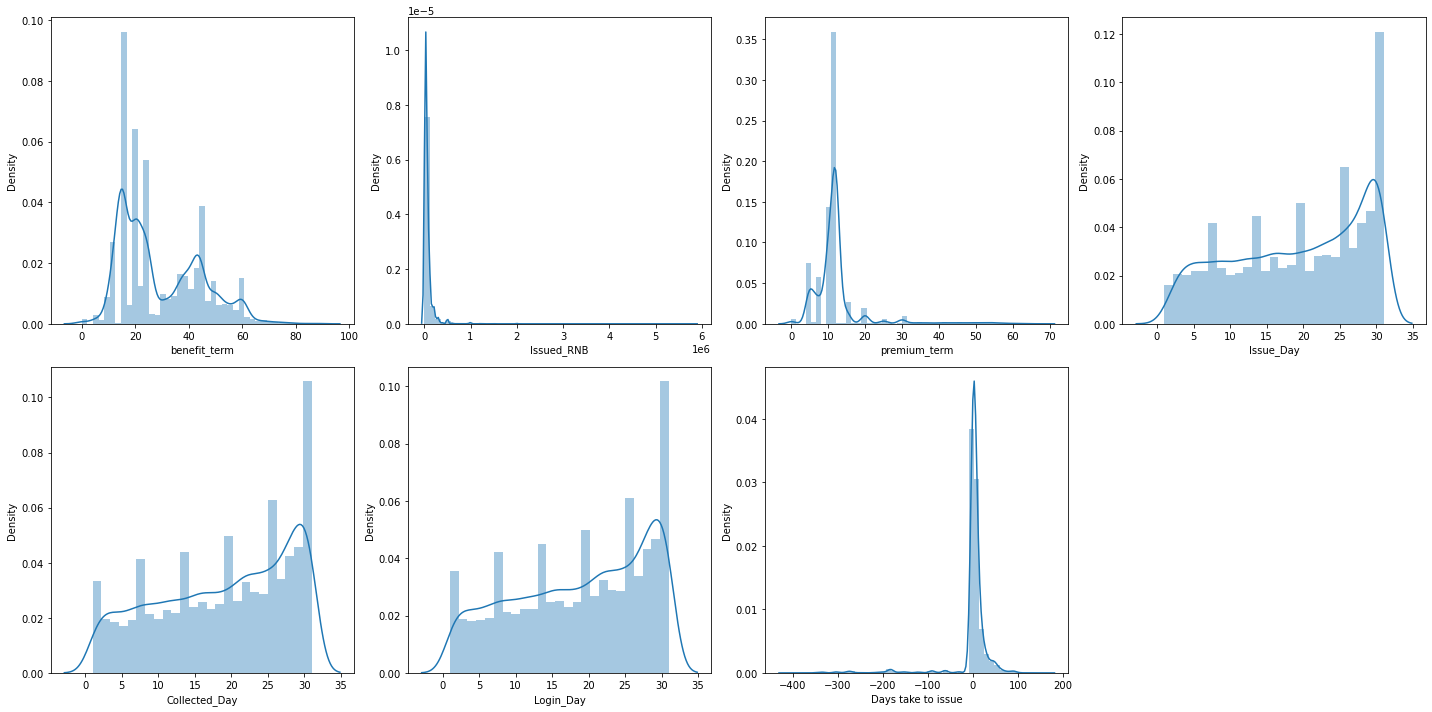

In [71]:
j=1
for i in num_cols:
    plt.subplot(2,4,j)
    sns.distplot(df_new[i])
    j=j+1
    
plt.tight_layout()
plt.show()

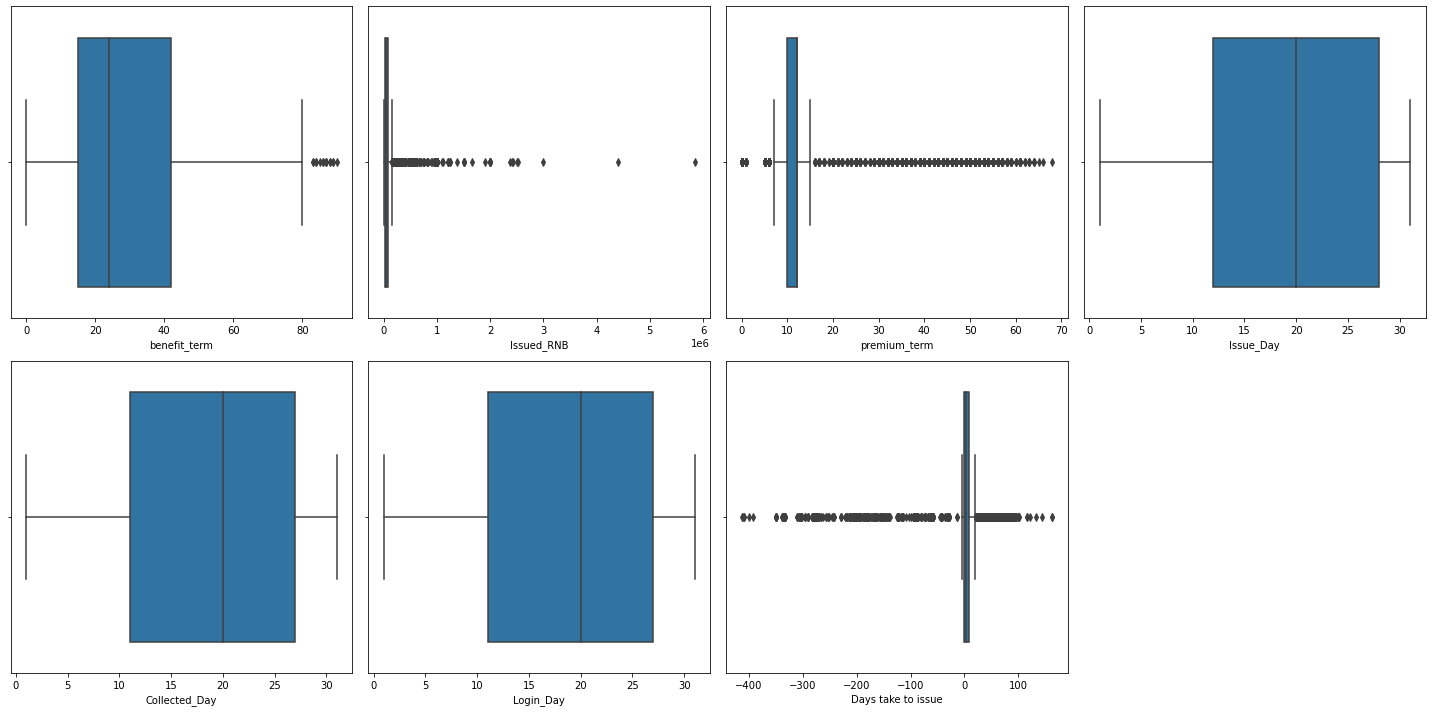

In [72]:
j=1
for i in num_cols:
    plt.subplot(2,4,j)
    sns.boxplot(df_new[i])
    j=j+1
    
plt.tight_layout()
plt.show()

* From the aboe graph we can see that there are outliers present in the data....

<hr>

#### Object Cols

In [73]:
obj_cols=['C_TRANSACTION_TYPE', 'CHANGE_DESCRIPTION', 'FREQUENCY', 'Issuance',
       'Login', 'New RH/SRH', 'Office_Cat', 'Region', 'SISO Flag',
       'Tagging for Raking Issuance', 'Tagging for Raking Login',
        'BOOKING_FREQUENCY', 'NOPs',
       'Issue_Quarter', 'Issue_Year', 
       'Collected_Quarter', 'Collected_Year', 'Login_Quarter',
       'Login_Year',  'Lapse or not', 
       'product_cat', 'Top 5 Products Group', 'CDA_yes_no']
len(obj_cols)

23

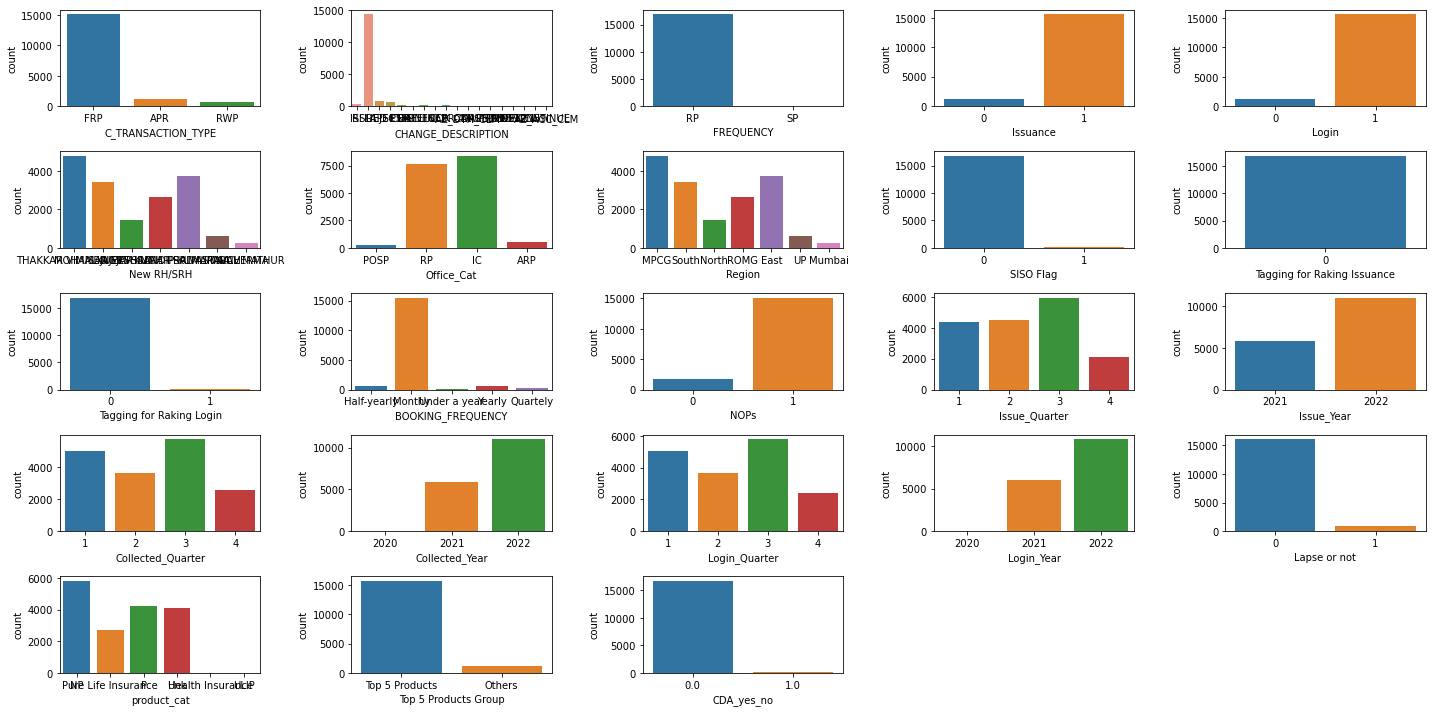

In [74]:
j=1
for i in obj_cols:
    plt.subplot(5,5,j)
    sns.countplot(df_new[i])
    j=j+1
    
plt.tight_layout()
plt.show()

* From the above graph we can remove Tagging for Raking Issuance...
* The data is highly imbalanced...

<hr>

### Bivariate Analysis SISO

#### Numeric Variables

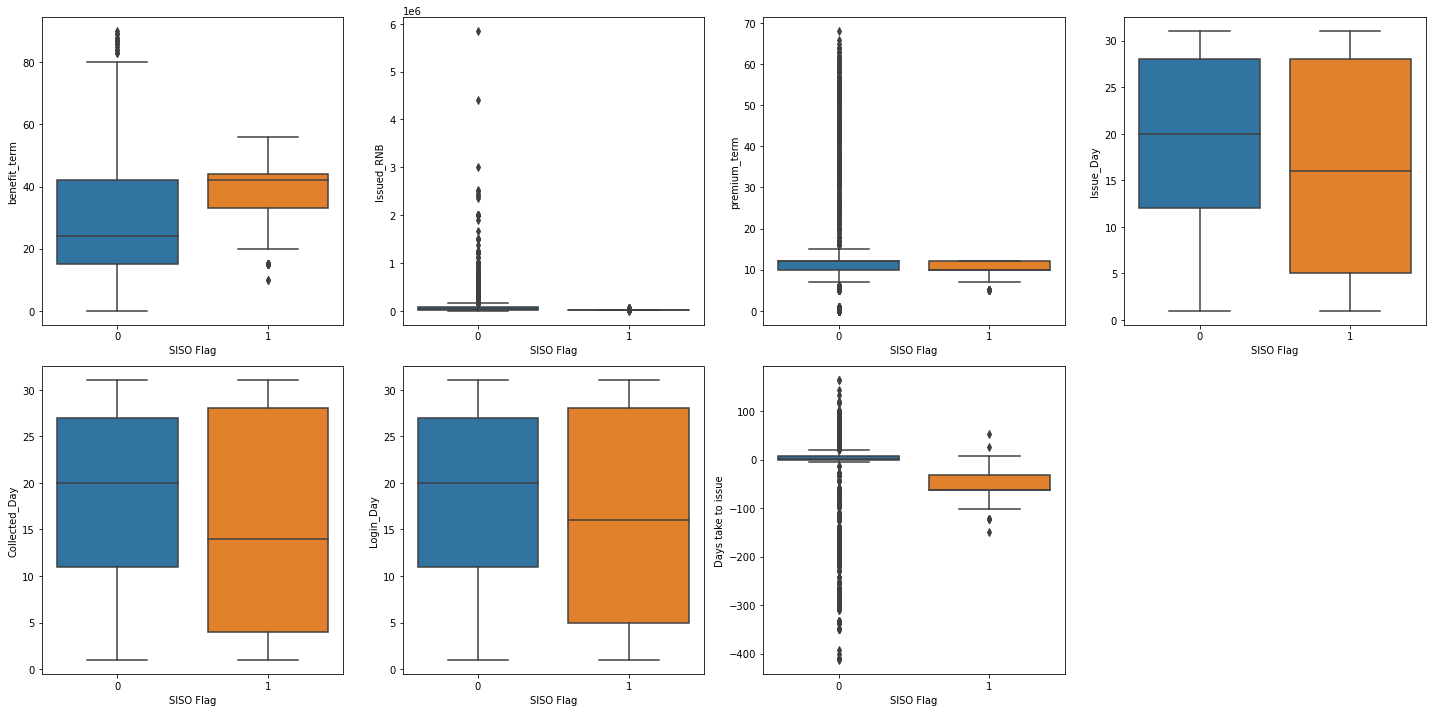

In [75]:
j=1
for i in num_cols:
    plt.subplot(2,4,j)
    sns.boxplot(df_new["SISO Flag"],df_new[i])
    j=j+1
    
plt.tight_layout()
plt.show()

* From the graph we can see that benefit term has as an impact on SISO Flag...

#### Categorical Columns

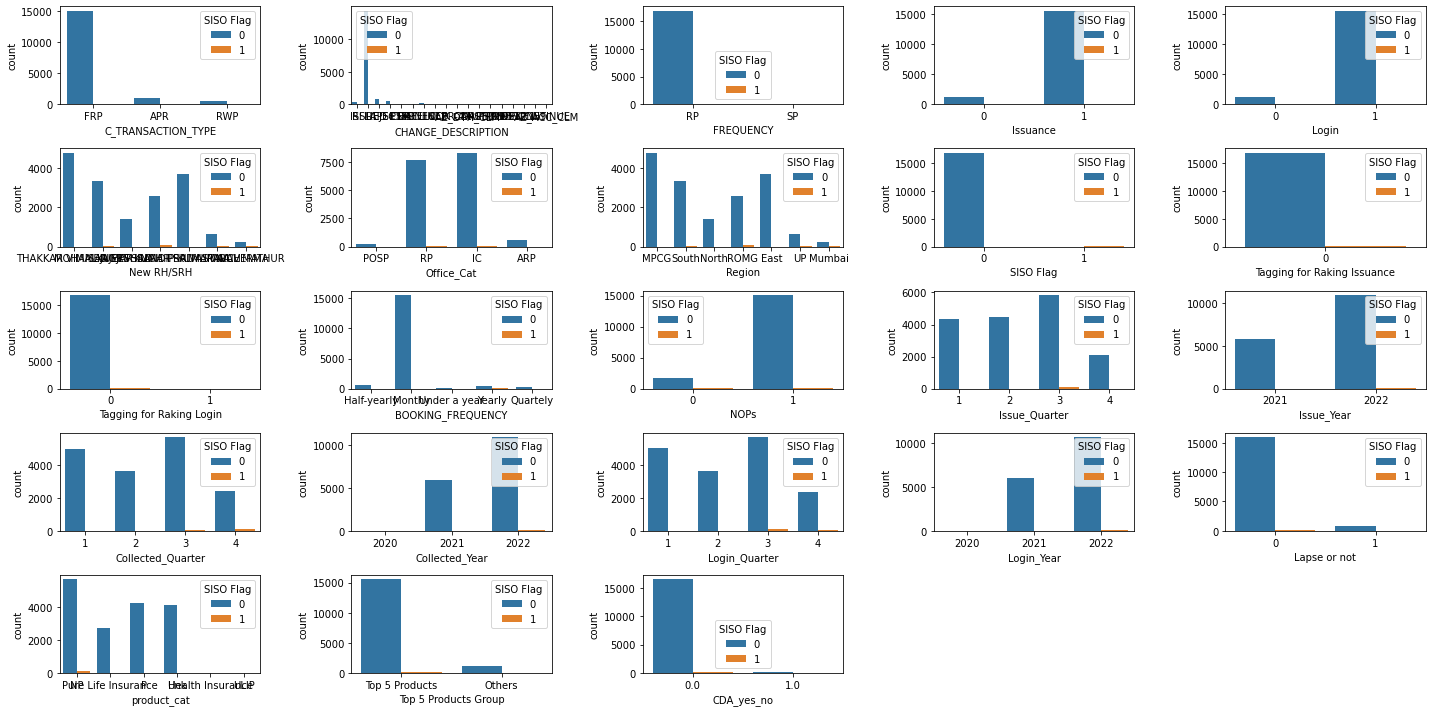

In [76]:
j=1
for i in obj_cols:
    plt.subplot(5,5,j)
    sns.countplot(df_new[i],hue=df_new["SISO Flag"])
    j=j+1
    
plt.tight_layout()
plt.show()

From the above analysis we can conclude that, if the policy is from RP/IC - Office_Cat, Booking Frequency - Yearly, Issued Quarter - 3,CDA- No, NP - ProductCat then the check is most likely to bounce

<hr>

### Bivariate Analysis Lapsed

#### Numeric Cols

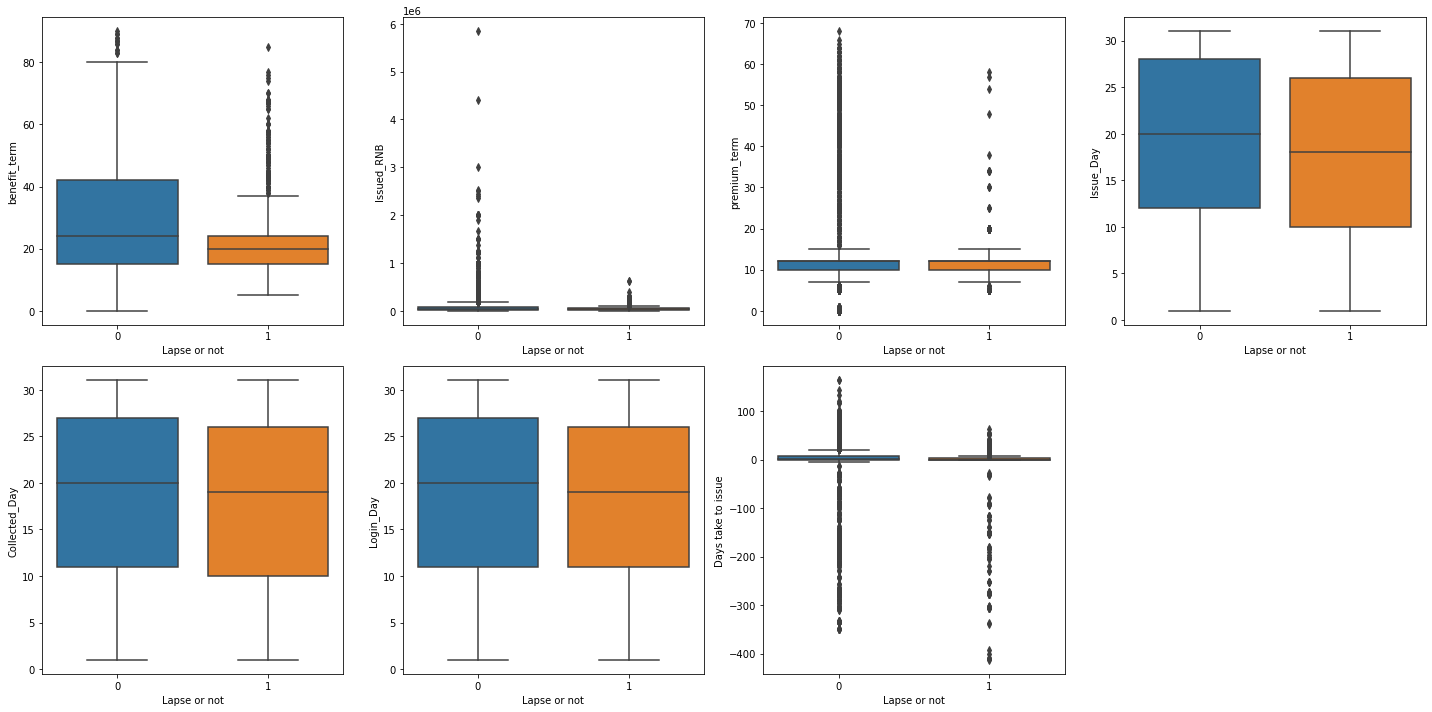

In [77]:
j=1
for i in num_cols:
    plt.subplot(2,4,j)
    sns.boxplot(df_new["Lapse or not"],df_new[i])
    j=j+1
    
plt.tight_layout()
plt.show()

* No noticable pattern....

#### Object Cols

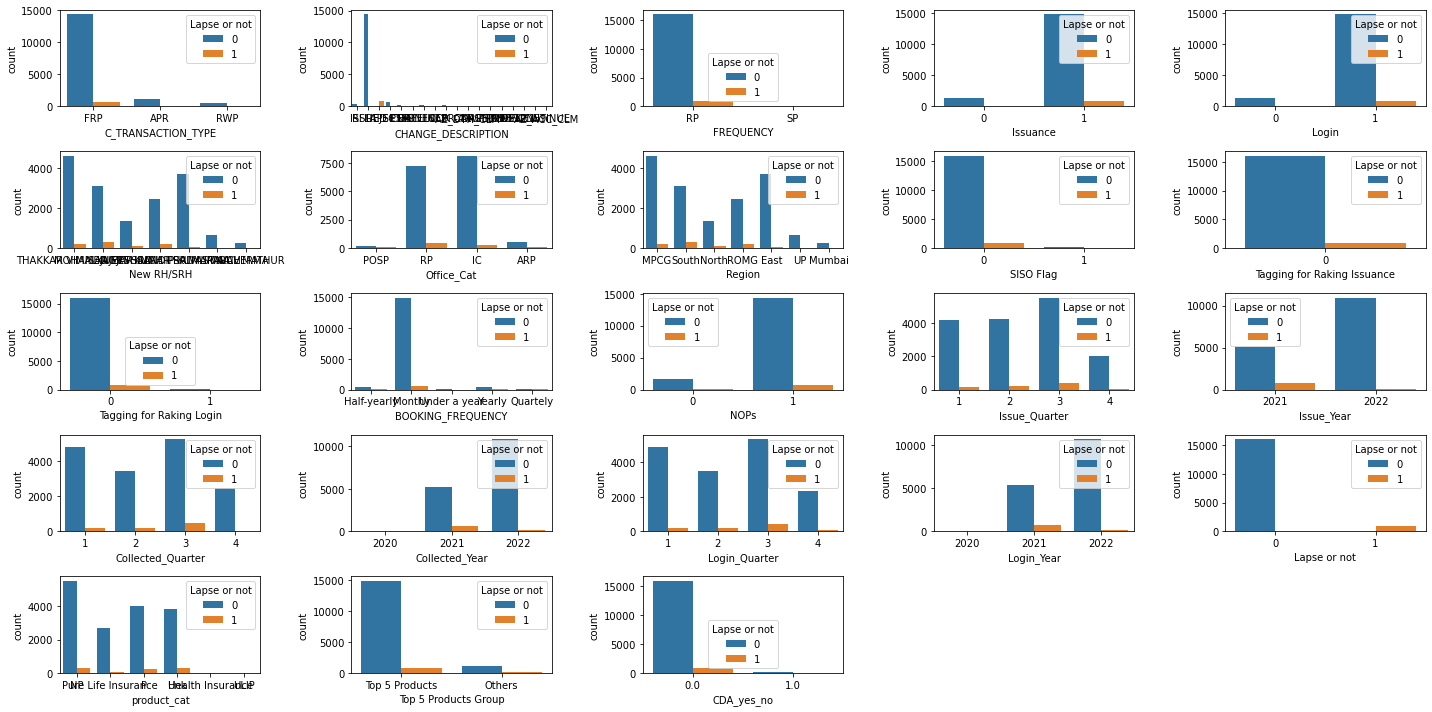

In [78]:
j=1
for i in obj_cols:
    plt.subplot(5,5,j)
    sns.countplot(df_new[i],hue=df_new["Lapse or not"])
    j=j+1
    
plt.tight_layout()
plt.show()

If the policy is of FRP,Frequeny is of RP, CDA - No etc... then the policy is most likely to lapse

<hr>

### Multivariate_Analysis

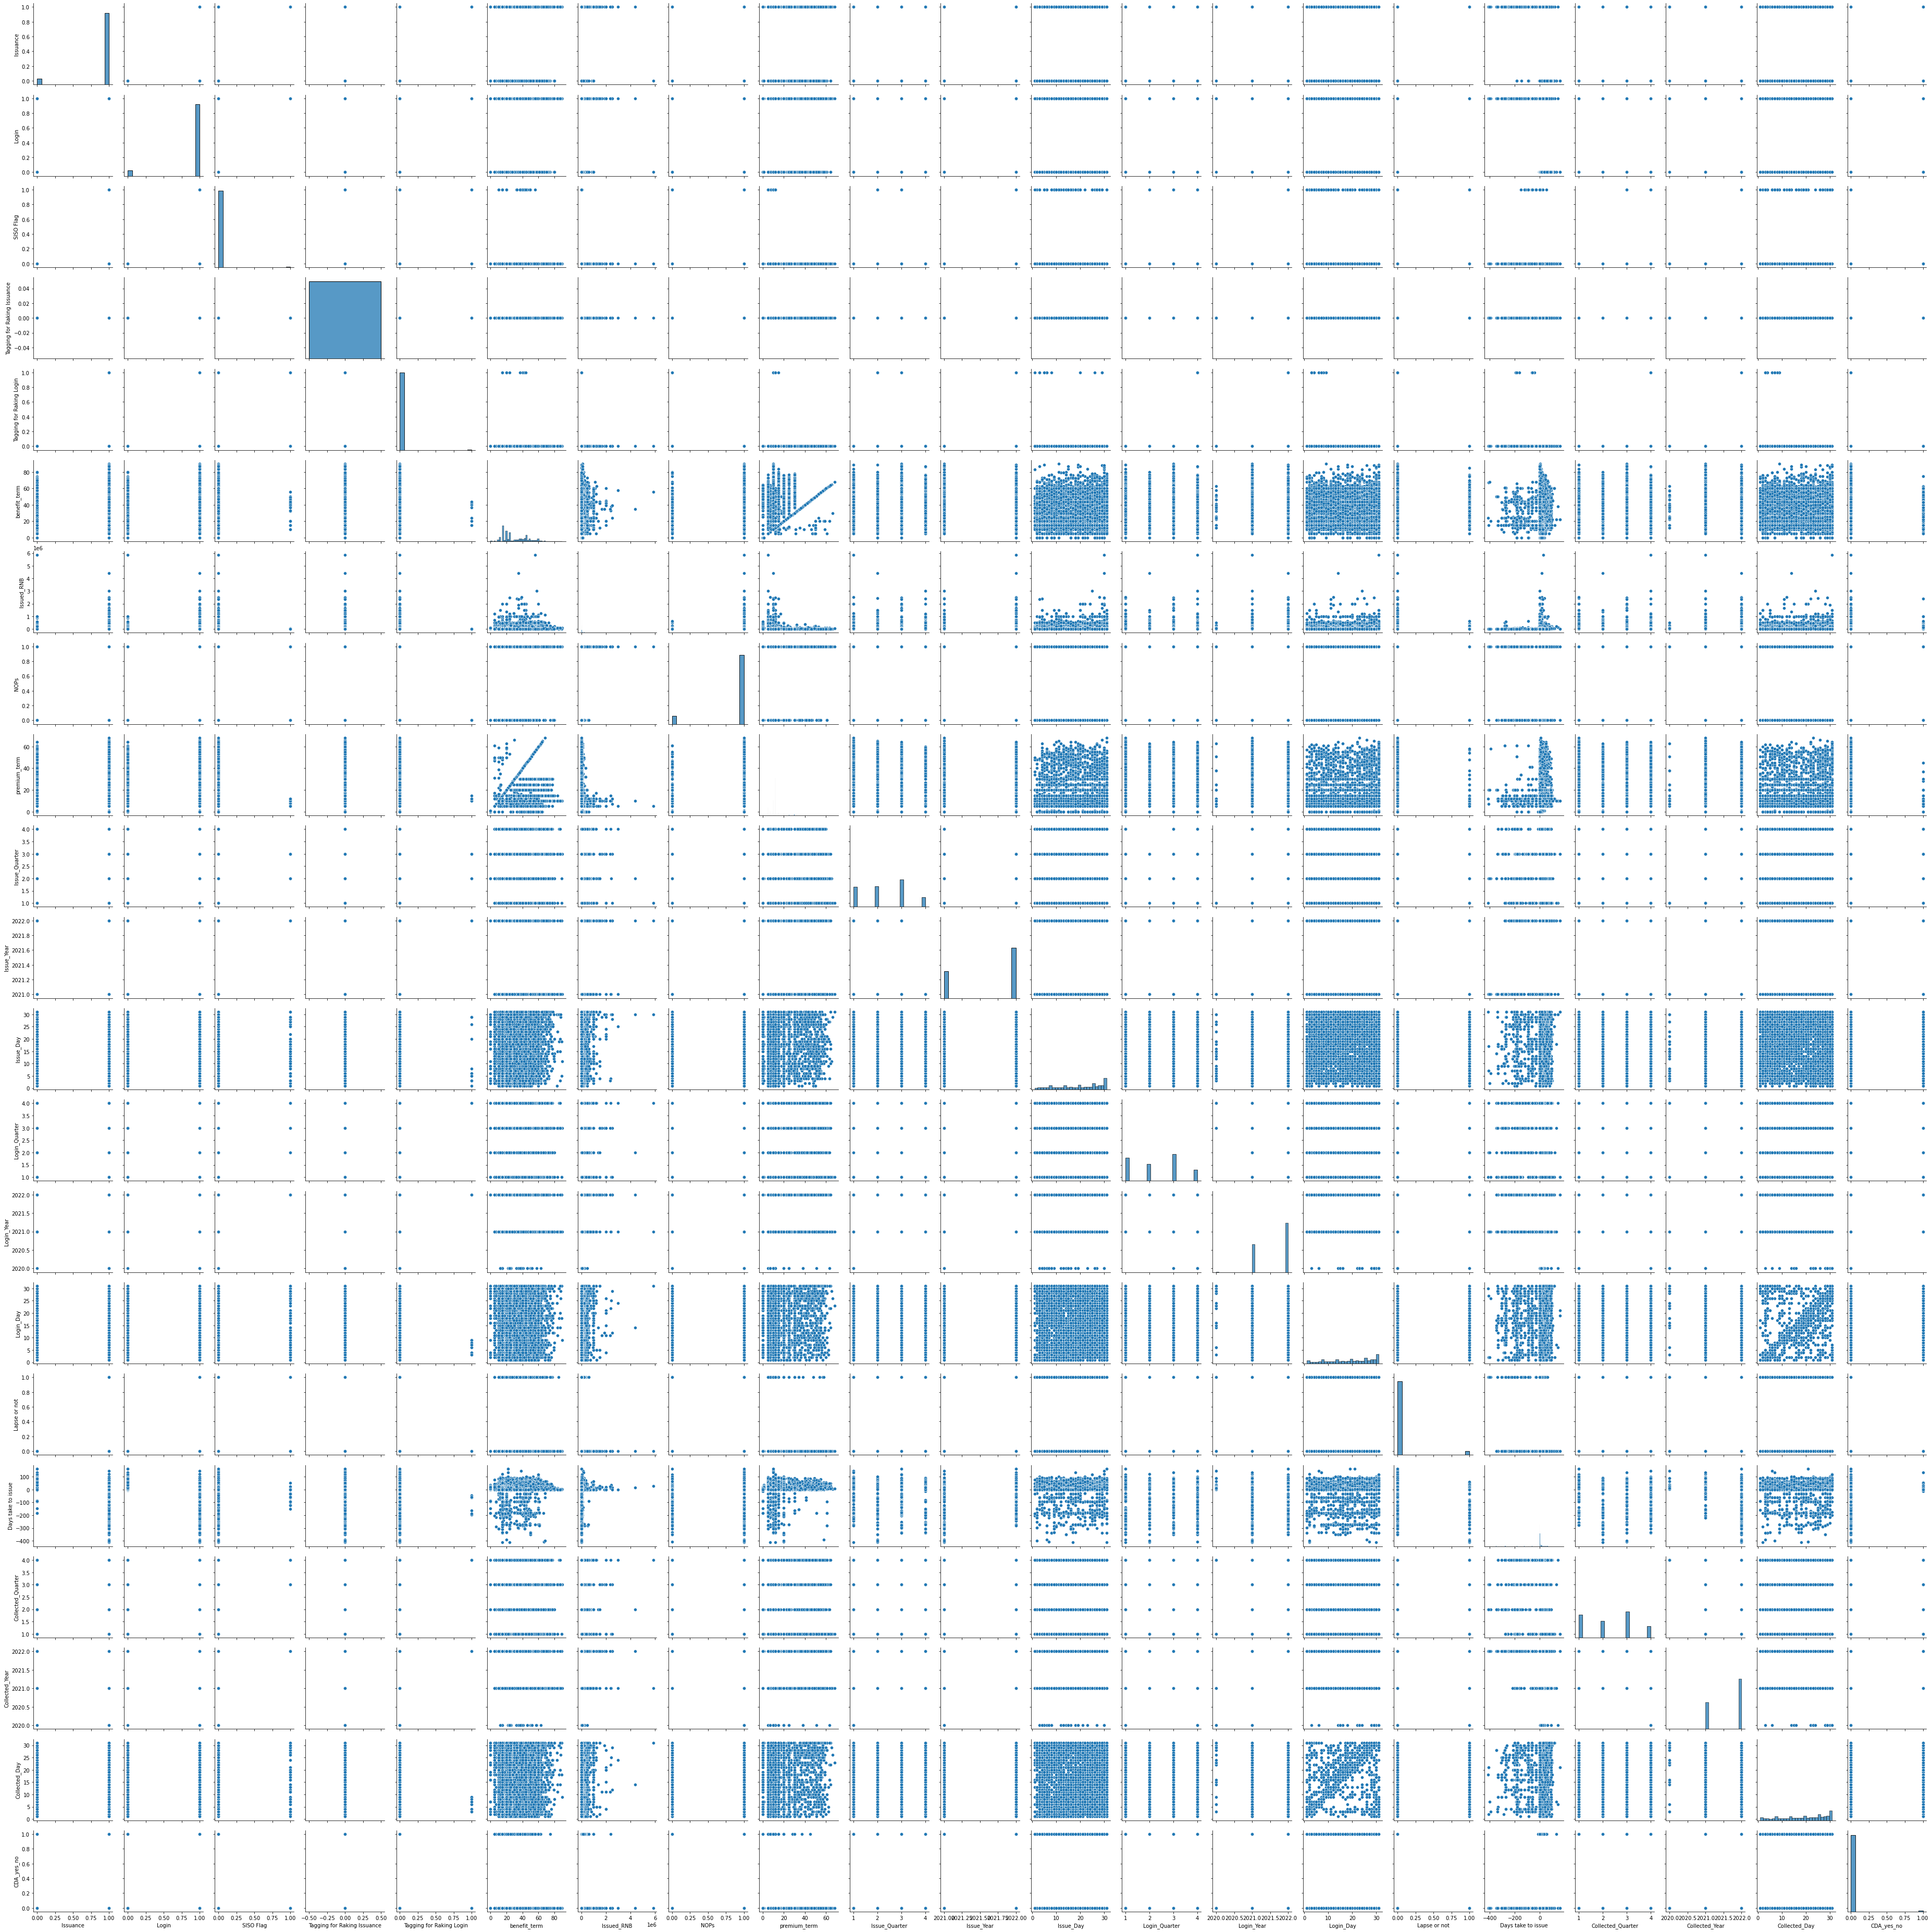

In [79]:
sns.pairplot(df_new)
plt.show()

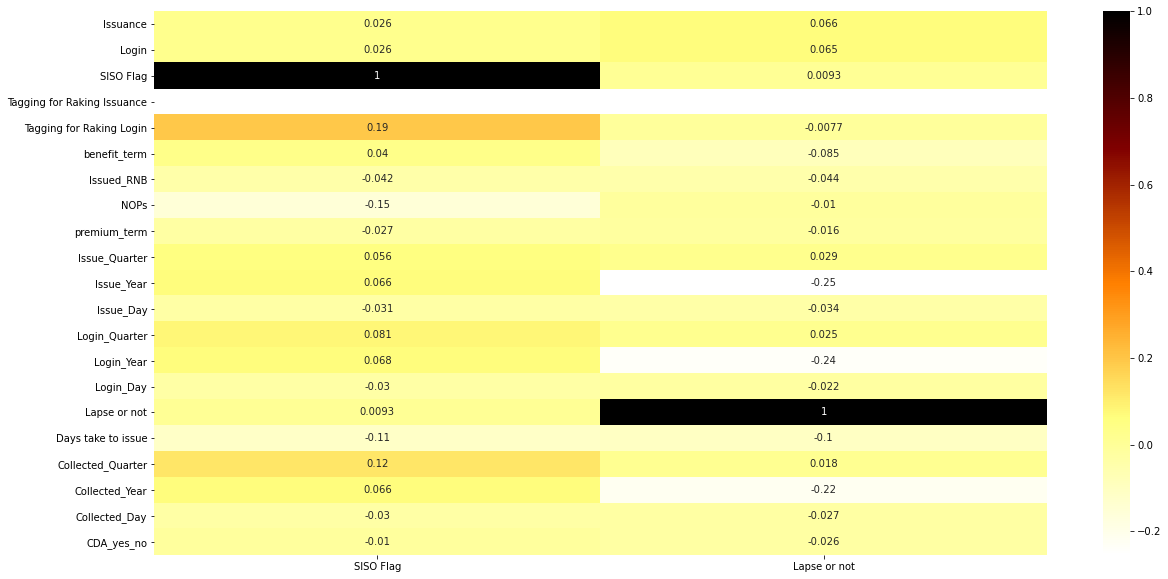

In [80]:
sns.heatmap(df_new.corr()[["SISO Flag","Lapse or not"]],annot=True,cmap="afmhot_r")
plt.show()

* Not able to find anything concrete

<hr>

### Outliers

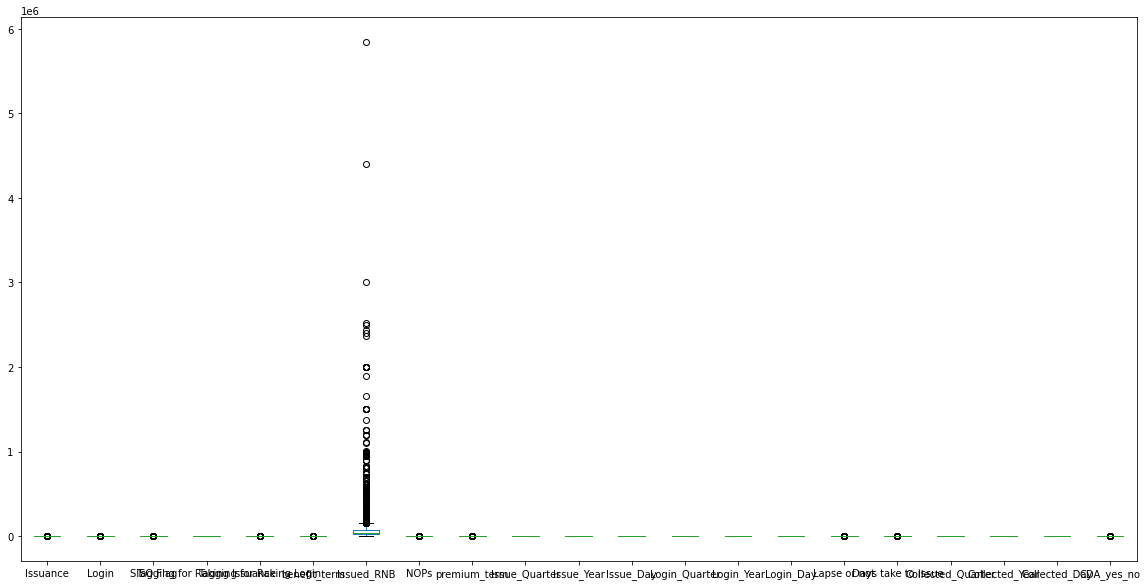

In [81]:
df_new.plot(kind="box")
plt.show()

In [82]:
q1=df_new.quantile(0.25)
q3=df_new.quantile(0.75)
IQR=q3-q1
ll=q1-(1.5*IQR)
ul=q3+(1.5*IQR)
df_new_outliers=df_new[~((df_new<ll)|(df_new>ul)).any(axis=1)]

In [83]:
df_new_outliers.shape

(9029, 30)

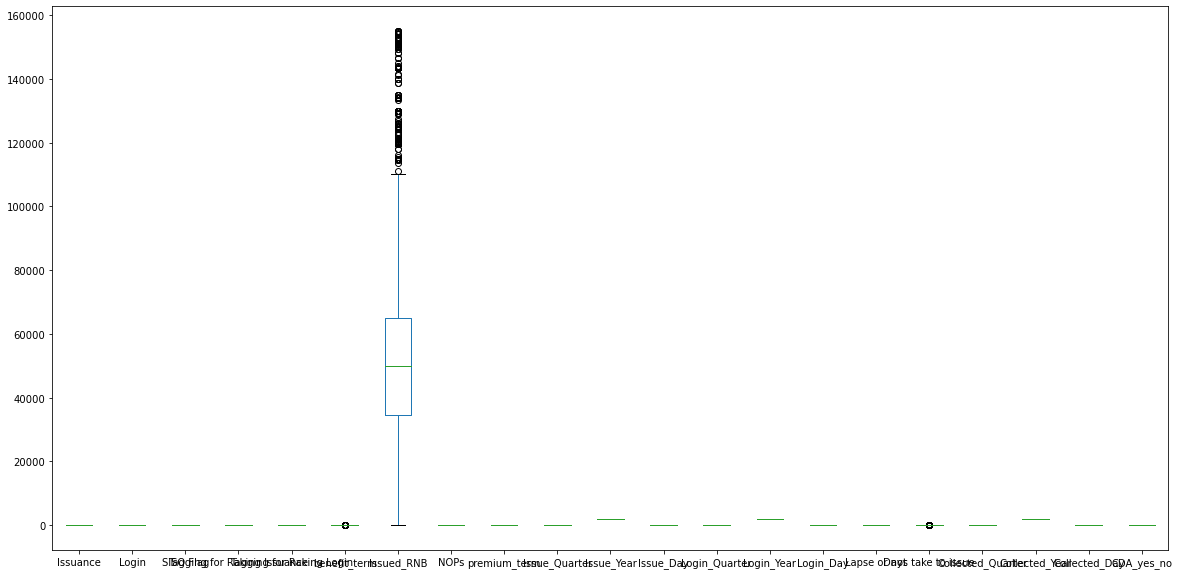

In [84]:
df_new_outliers.plot(kind="box")
plt.show()

* We cant remove the outliers because if we remove the outliers we are losing our target variables...
* Since we cannot remove outliers we will try to reduce the skewness using log transformation...

Transforming Issued RNB to reduce the skewness

In [85]:
df_new["Issued_RNB"]=np.power(df_new["Issued_RNB"],1/3)

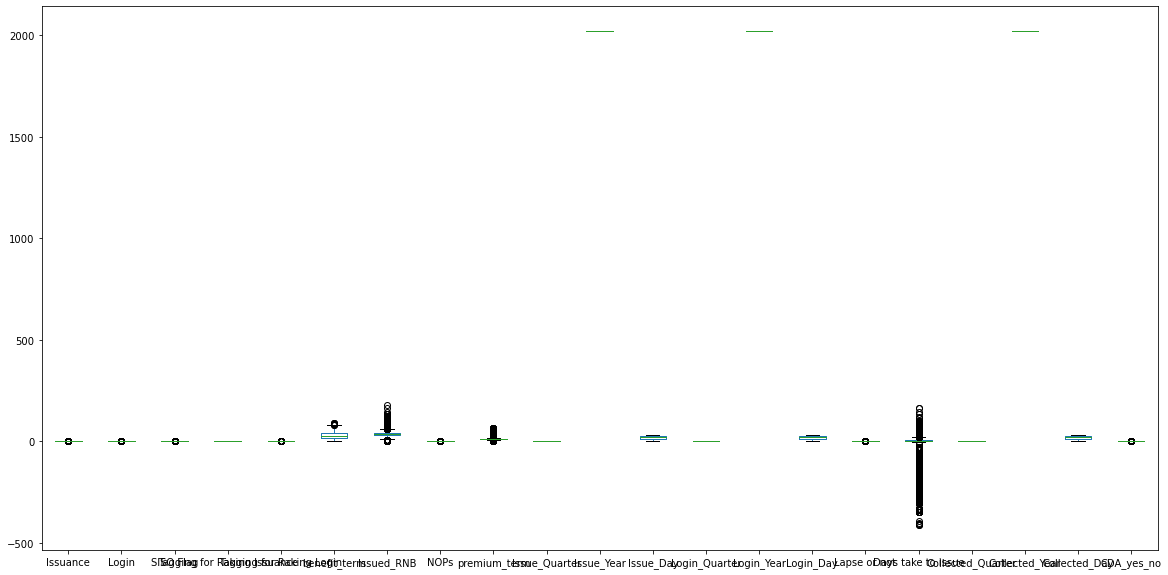

In [86]:
df_new.plot(kind="box")
plt.show()

<hr>

### Removing More Redundant Columns

In [87]:
df_new.shape

(16890, 30)

In [88]:
df_new.columns

Index(['C_TRANSACTION_TYPE', 'CHANGE_DESCRIPTION', 'FREQUENCY', 'Issuance',
       'Login', 'New RH/SRH', 'Office_Cat', 'Region', 'SISO Flag',
       'Tagging for Raking Issuance', 'Tagging for Raking Login',
       'benefit_term', 'BOOKING_FREQUENCY', 'Issued_RNB', 'NOPs',
       'premium_term', 'Issue_Quarter', 'Issue_Year', 'Issue_Day',
       'Login_Quarter', 'Login_Year', 'Login_Day', 'Lapse or not',
       'Days take to issue', 'Collected_Quarter', 'Collected_Year',
       'Collected_Day', 'product_cat', 'Top 5 Products Group', 'CDA_yes_no'],
      dtype='object')

In [89]:
df_new.drop("Tagging for Raking Issuance",axis=1,inplace=True)

In [90]:
df_new.drop(['Collected_Day','Issue_Day','Login_Day'],axis=1,inplace=True)

In [91]:
df_new.shape

(16890, 26)

In [92]:
df_new.columns

Index(['C_TRANSACTION_TYPE', 'CHANGE_DESCRIPTION', 'FREQUENCY', 'Issuance',
       'Login', 'New RH/SRH', 'Office_Cat', 'Region', 'SISO Flag',
       'Tagging for Raking Login', 'benefit_term', 'BOOKING_FREQUENCY',
       'Issued_RNB', 'NOPs', 'premium_term', 'Issue_Quarter', 'Issue_Year',
       'Login_Quarter', 'Login_Year', 'Lapse or not', 'Days take to issue',
       'Collected_Quarter', 'Collected_Year', 'product_cat',
       'Top 5 Products Group', 'CDA_yes_no'],
      dtype='object')

In [93]:
obj_cols=['C_TRANSACTION_TYPE', 'CHANGE_DESCRIPTION', 'FREQUENCY', 'Issuance',
       'Login', 'New RH/SRH', 'Office_Cat', 'Region', 'SISO Flag',
       'Tagging for Raking Login', 'BOOKING_FREQUENCY',
        'NOPs',  'Issue_Quarter', 'Issue_Year',
       'Collected_Quarter', 'Collected_Year', 'Login_Quarter', 'Login_Year',
       'Lapse or not',  'product_cat',
       'Top 5 Products Group', 'CDA_yes_no']

In [94]:
num_cols=['benefit_term',
 'Issued_RNB',
 'premium_term',
 'Days take to issue']

<hr>

In [95]:
dates_cols=["Issue_Quarter","Issue_Year","Login_Quarter","Login_Year","Collected_Quarter","Collected_Year"]

In [96]:
for i in dates_cols:
    df_new[i]=df_new[i].astype(object)

In [97]:
df_new["CDA_yes_no"]=df_new["CDA_yes_no"].astype(int)

In [98]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16890 entries, 271 to 20797
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   C_TRANSACTION_TYPE        16890 non-null  object 
 1   CHANGE_DESCRIPTION        16890 non-null  object 
 2   FREQUENCY                 16890 non-null  object 
 3   Issuance                  16890 non-null  int64  
 4   Login                     16890 non-null  int64  
 5   New RH/SRH                16890 non-null  object 
 6   Office_Cat                16890 non-null  object 
 7   Region                    16890 non-null  object 
 8   SISO Flag                 16890 non-null  int64  
 9   Tagging for Raking Login  16890 non-null  int64  
 10  benefit_term              16890 non-null  int64  
 11  BOOKING_FREQUENCY         16890 non-null  object 
 12  Issued_RNB                16890 non-null  float64
 13  NOPs                      16890 non-null  int64  
 14  prem

<hr>

# Hypothesis_Testing

### Hypothesis_Testing_Lapsed

In [99]:
import scipy.stats as stats

#### Categorical

In [100]:
def chi_hypothesis_test(col_group,target_variable):
    
    sig_var=[]
    insig_var=[]
    
    for i in col_group:
        
        #print(f"\nH0 : The variables are insignificant")
        #print(f"\nHa : The variables are significant")

        # Obs Values
        obs=pd.crosstab(index=df_new[i],columns=df_new[target_variable])

        # Chi Square Test
        teststats,pvalue,dof,exp=stats.chi2_contingency(observed=obs,correction=False)
        
        # Pvalue 
        # print(f"\nPvalue for {i} = {pvalue}")

        # Significant or not
        if pvalue<0.05:
            #print(f"\nThe variable {i} is significant")
            sig_var.append(i)
        else:
            #print(f"\nThe variable {i} is not significant")
            insig_var.append(i)
    
    print(f"\nSignificant Variables are = {sig_var}")
    print(f"\nInsignificant Variables are = {insig_var}")

In [101]:
chi_hypothesis_test(obj_cols,"Lapse or not")


Significant Variables are = ['C_TRANSACTION_TYPE', 'CHANGE_DESCRIPTION', 'Issuance', 'Login', 'New RH/SRH', 'Office_Cat', 'Region', 'BOOKING_FREQUENCY', 'Issue_Quarter', 'Issue_Year', 'Collected_Quarter', 'Collected_Year', 'Login_Quarter', 'Login_Year', 'Lapse or not', 'product_cat', 'Top 5 Products Group', 'CDA_yes_no']

Insignificant Variables are = ['FREQUENCY', 'SISO Flag', 'Tagging for Raking Login', 'NOPs']


#### Numeric

In [102]:
def ttest_hypothesis_test(num_cols,target_var):
    sig_var=[]
    insig_var=[]

    for i in num_cols:
        zero_class=df_new[df_new[target_var]==0][i]
        one_class=df_new[df_new[target_var]==1][i]

        teststats,pvalue=stats.ttest_ind(zero_class,one_class)

        # Pvalue 
        #print(f"\nPvalue for {i} = {pvalue}")

        # Significant or not
        if pvalue<0.05:
            #print(f"\nThe variable {i} is significant")
            sig_var.append(i)
        else:
            #print(f"\nThe variable {i} is not significant")
            insig_var.append(i)

    print(f"\nSignificant Variables are = {sig_var}")
    print(f"\nInsignificant Variables are = {insig_var}")


In [103]:
ttest_hypothesis_test(num_cols,"Lapse or not")


Significant Variables are = ['benefit_term', 'Issued_RNB', 'premium_term', 'Days take to issue']

Insignificant Variables are = []


In [104]:
df_new.drop("Days take to issue",axis=1,inplace=True)

In [105]:
lapse=df_new.drop(['FREQUENCY', 'SISO Flag', 'Tagging for Raking Login', 'NOPs','CHANGE_DESCRIPTION'],axis=1)

In [106]:
lapse.shape

(16890, 20)

In [107]:
lapse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16890 entries, 271 to 20797
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   C_TRANSACTION_TYPE    16890 non-null  object 
 1   Issuance              16890 non-null  int64  
 2   Login                 16890 non-null  int64  
 3   New RH/SRH            16890 non-null  object 
 4   Office_Cat            16890 non-null  object 
 5   Region                16890 non-null  object 
 6   benefit_term          16890 non-null  int64  
 7   BOOKING_FREQUENCY     16890 non-null  object 
 8   Issued_RNB            16890 non-null  float64
 9   premium_term          16890 non-null  int64  
 10  Issue_Quarter         16890 non-null  object 
 11  Issue_Year            16890 non-null  object 
 12  Login_Quarter         16890 non-null  object 
 13  Login_Year            16890 non-null  object 
 14  Lapse or not          16890 non-null  int64  
 15  Collected_Quarter

<hr>

### Hypothesis_Testing_SISO_Flag

#### Categorical

In [108]:
chi_hypothesis_test(obj_cols,"SISO Flag")


Significant Variables are = ['C_TRANSACTION_TYPE', 'Issuance', 'Login', 'New RH/SRH', 'Office_Cat', 'Region', 'SISO Flag', 'Tagging for Raking Login', 'BOOKING_FREQUENCY', 'NOPs', 'Issue_Quarter', 'Issue_Year', 'Collected_Quarter', 'Collected_Year', 'Login_Quarter', 'Login_Year', 'product_cat', 'Top 5 Products Group']

Insignificant Variables are = ['CHANGE_DESCRIPTION', 'FREQUENCY', 'Lapse or not', 'CDA_yes_no']


#### Numeric

In [109]:
num_cols.remove("Days take to issue")

In [110]:
ttest_hypothesis_test(num_cols,"SISO Flag")


Significant Variables are = ['benefit_term', 'Issued_RNB', 'premium_term']

Insignificant Variables are = []


In [111]:
siso=df_new.drop(['CHANGE_DESCRIPTION', 'FREQUENCY', 'Lapse or not', 'CDA_yes_no'],axis=1)

In [112]:
siso.shape

(16890, 21)

<hr>

<hr>

# Data_Prep

#### X n Y Lapse

In [113]:
xlapse=lapse.drop("Lapse or not",axis=1)
ylapse=lapse["Lapse or not"]

#### Dummies lapse

In [114]:
xlapse=pd.get_dummies(xlapse,drop_first=True)
xlapse.shape

(16890, 47)

#### X n Y SISO

In [115]:
xsiso=siso.drop("SISO Flag",axis=1)
ysiso=siso["SISO Flag"]

#### Dummies SISO

In [116]:
xsiso=pd.get_dummies(xsiso,drop_first=True)
xsiso.shape

(16890, 48)

<hr>

In [117]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,classification_report,f1_score,roc_auc_score,roc_curve,confusion_matrix

<hr>

### KFold Selection For SISO Flag

In [334]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=10) 

for train_index,test_index in kf.split(xsiso,ysiso):
    xtrain_siso = xsiso.iloc[train_index] # Xtrain
    xtest_siso  = xsiso.iloc[test_index]  # Xtest
    ytrain_siso = ysiso.iloc[train_index] # Ytrain
    ytest_siso  = ysiso.iloc[test_index]  # Ytest

### SMOTE For Imbalance Data (SISO)

In [335]:
from imblearn.over_sampling import SMOTE

In [336]:
smote=SMOTE(sampling_strategy="minority")
siso_sm_x,siso_sm_y=smote.fit_resample(xsiso,ysiso)


In [337]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=10) 

for train_index,test_index in kf.split(siso_sm_x,siso_sm_y):
    xtrain_siso_sm = siso_sm_x.iloc[train_index] # Xtrain
    xtest_siso_sm  = siso_sm_x.iloc[test_index]  # Xtest
    ytrain_siso_sm = siso_sm_y.iloc[train_index] # Ytrain
    ytest_siso_sm  = siso_sm_y.iloc[test_index]  # Ytest

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

<hr>

### KFold Selection For Lapsed

In [338]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=10) 

for train_index,test_index in kf.split(xlapse,ylapse):
    xtrain_lapse = xlapse.iloc[train_index] # Xtrain
    xtest_lapse  = xlapse.iloc[test_index]  # Xtest
    ytrain_lapse = ylapse.iloc[train_index] # Ytrain
    ytest_lapse  = ylapse.iloc[test_index]  # Ytest

### SMOTE For Imbalance Dataset (Lapsed)

In [339]:
smote=SMOTE(sampling_strategy="minority")
lapse_sm_x,lapse_sm_y=smote.fit_resample(xlapse,ylapse)


In [340]:
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=10) 

for train_index,test_index in kf.split(lapse_sm_x,lapse_sm_y):
    xtrain_lapse_sm = lapse_sm_x.iloc[train_index] # Xtrain
    xtest_lapse_sm  = lapse_sm_x.iloc[test_index]  # Xtest
    ytrain_lapse_sm = lapse_sm_y.iloc[train_index] # Ytrain
    ytest_lapse_sm  = lapse_sm_y.iloc[test_index]  # Ytest

<hr>

# Model_Building

### Problem Statement : Predicting the check bounce case using SISO Flag

#### Using Cross Validation For Model Selection

We are going to use cross val score to select our best models... After selecting our best models we will do the normal prediction.... After normal prediction we will fine tune our model for better performance.... We will compare the tuned model and default model and then we will take a call....

* We are using **F1 Score** as the metric, to assess the model performance as the data is highly imbalanced... 

#### Base Models

In [341]:
# Base Models
def base_models():
    models=dict()
    models["lg"]=LogisticRegression()
    models["dtree"]=DecisionTreeClassifier()
    models["etree"]=ExtraTreeClassifier()
    models["knn"]=KNeighborsClassifier()
    models["BNB"]=BernoulliNB()
    models["GNB"]=GaussianNB()
    return models

In [342]:
# Evalution the model...
def eval_models(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
    scores=cross_val_score(estimator=model,X=xsiso,y=ysiso,scoring="matthews_corrcoef",cv=cv,error_score="raise",n_jobs=-1)
    return scores


In [343]:
# Build Models
models=base_models()

# List for result and model names
result,names=list(),list()

for name,model in models.items():
    scores=eval_models(model)
    result.append(scores)
    names.append(name)
    print(">%s %.3f (%.3f)"%(name,np.mean(scores),np.std(scores)))

>lg 0.968 (0.013)
>dtree 0.982 (0.023)
>etree 0.941 (0.044)
>knn 0.907 (0.045)
>BNB 0.724 (0.049)
>GNB 0.947 (0.023)


In [344]:
model_perf_siso=pd.DataFrame({"Model Name":names,"F1 Score":np.mean(result,axis=1)})

We tested 6 models as models for this problem statement. Below are the results of the models....

In [345]:
model_perf_siso

,Model Name,F1 Score
0,lg,0.967737
1,dtree,0.982194
2,etree,0.941009
3,knn,0.906978
4,BNB,0.724010
5,GNB,0.947446


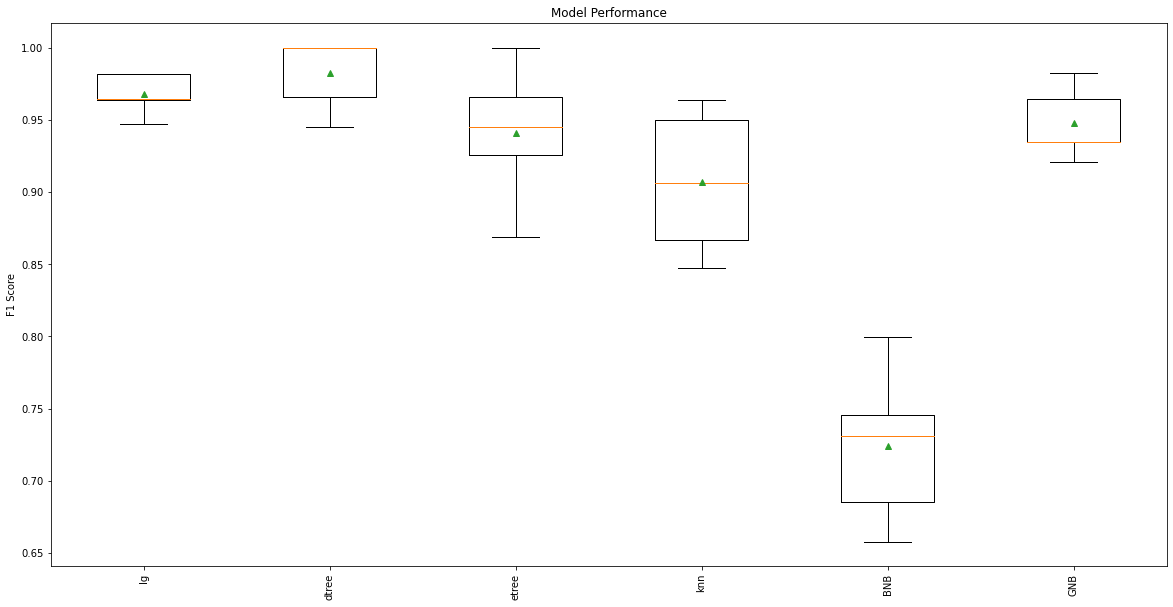

In [346]:
# Plotting the Output

plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.show()

From the above result, we see that dtree,etree,lg,GNB are overfitting.... therefore we will go ahead with BNB and KNN

In [347]:
from sklearn.metrics import matthews_corrcoef

In [348]:
base_model_perf_siso=pd.DataFrame(columns=["Model Name","F1 Score","Accuracy Score","AUC Score"])
base_model_perf_siso

,Model Name,F1 Score,Accuracy Score,AUC Score


### BernoulliNB SISO

In [349]:
# Build Model
bnb=BernoulliNB()
bnb.fit(xtrain_siso,ytrain_siso)

# Prediction
finalpred=bnb.predict(xtest_siso)
finalpred_prob=bnb.predict_proba(xtest_siso)

# Metrics
print(classification_report(ytest_siso,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_siso,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_siso,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_siso,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_siso,finalpred)}")




              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3350
           1       0.54      1.00      0.70        28

    accuracy                           0.99      3378
   macro avg       0.77      1.00      0.85      3378
weighted avg       1.00      0.99      0.99      3378

F1 score = 0.7311661258285476
Accuracy score = 0.9928952042628775
AUC Score = 0.9993283582089553
Confusion Matric = 
[[3326   24]
 [   0   28]]


In [350]:
base_model_perf_siso=base_model_perf_siso.append({"Model Name":"BernoulliNB","F1 Score":matthews_corrcoef(ytest_siso,finalpred)
                                                 ,"Accuracy Score":accuracy_score(ytest_siso,finalpred),
                                                  "AUC Score":roc_auc_score(ytest_siso,finalpred_prob[:,1])}
                                                 ,ignore_index=True)

In [351]:
base_model_perf_siso

,Model Name,F1 Score,Accuracy Score,AUC Score
0,BernoulliNB,0.731166,0.992895,0.999328


### KNN

In [352]:
# Build Model
knn=KNeighborsClassifier()
knn.fit(xtrain_siso,ytrain_siso)

# Prediction
finalpred=knn.predict(xtest_siso)
finalpred_prob=knn.predict_proba(xtest_siso)

# Metrics
print(classification_report(ytest_siso,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_siso,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_siso,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_siso,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_siso,finalpred)}")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3350
           1       0.96      0.96      0.96        28

    accuracy                           1.00      3378
   macro avg       0.98      0.98      0.98      3378
weighted avg       1.00      1.00      1.00      3378

F1 score = 0.9639872068230277
Accuracy score = 0.9994079336885732
AUC Score = 0.9999733475479744
Confusion Matric = 
[[3349    1]
 [   1   27]]


In [353]:
base_model_perf_siso=base_model_perf_siso.append({"Model Name":"KNN","F1 Score":matthews_corrcoef(ytest_siso,finalpred)
                                                 ,"Accuracy Score":accuracy_score(ytest_siso,finalpred),
                                                  "AUC Score":roc_auc_score(ytest_siso,finalpred_prob[:,1])}
                                                 ,ignore_index=True)

In [354]:
base_model_perf_siso

,Model Name,F1 Score,Accuracy Score,AUC Score
0,BernoulliNB,0.731166,0.992895,0.999328
1,KNN,0.963987,0.999408,0.999973


<hr>

#### Advanced Models

In [355]:
# Advanced Models
def advanced_models():
    models=dict()
    models["rf"]=RandomForestClassifier()
    models["gbm"]=GradientBoostingClassifier()
    models["lgbm"]=LGBMClassifier()
    models["xgb"]=XGBClassifier()
    models["ada"]=AdaBoostClassifier()
    return models

In [356]:
# Evalution the model...
def eval_models(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
    scores=cross_val_score(estimator=model,X=xsiso,y=ysiso,scoring="matthews_corrcoef",cv=cv,error_score="raise",n_jobs=-1)
    return scores


In [357]:
# Build Models
models=advanced_models()

# List for result and model names
result,names=list(),list()

for name,model in models.items():
    scores=eval_models(model)
    result.append(scores)
    names.append(name)
    print(">%s %.3f (%.3f)"%(name,np.mean(scores),np.std(scores)))

>rf 0.985 (0.022)
>gbm 0.982 (0.023)
>lgbm 0.986 (0.017)
>xgb 0.982 (0.023)
>ada 0.986 (0.018)


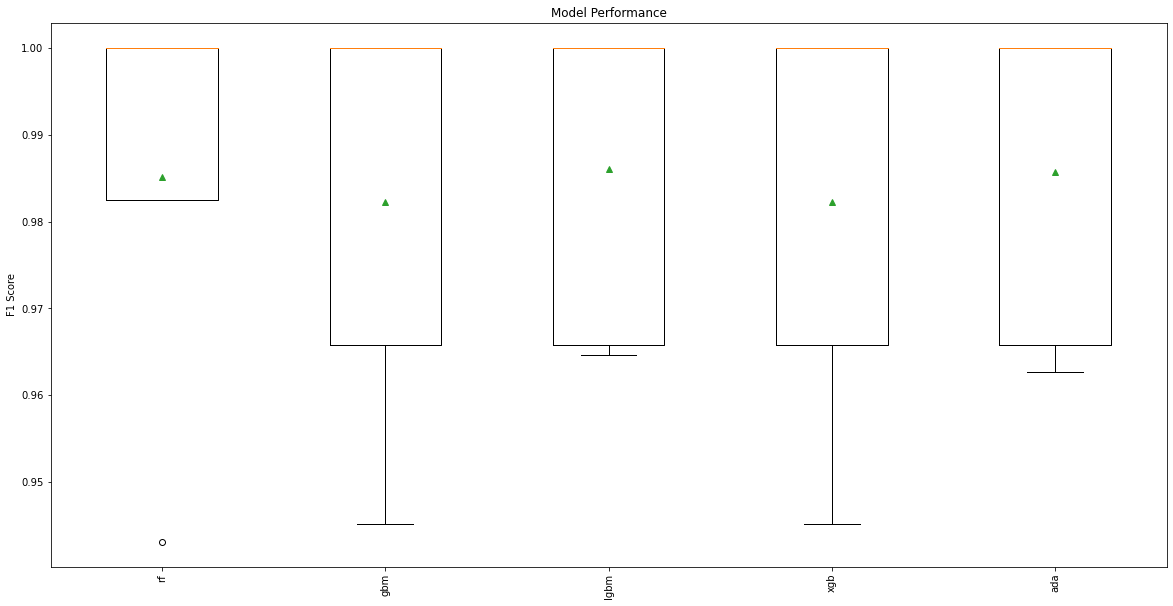

In [358]:
# Plotting the Output

plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.show()

From the above result, we see that almost all the advanced models are overfitting, but if we have to choose then we will choose gbm and xgb model

In [359]:
advanced_model_perf_siso=pd.DataFrame(columns=["Model Name","F1 Score","Accuracy Score","AUC Score"])
advanced_model_perf_siso

,Model Name,F1 Score,Accuracy Score,AUC Score


### Gradient Boosting

In [360]:
# Build Model
gbm=GradientBoostingClassifier()
gbm.fit(xtrain_siso,ytrain_siso)

# Prediction
finalpred=gbm.predict(xtest_siso) 
finalpred_prob=gbm.predict_proba(xtest_siso)

# Metrics
print(classification_report(ytest_siso,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_siso,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_siso,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_siso,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_siso,finalpred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3350
           1       0.93      1.00      0.97        28

    accuracy                           1.00      3378
   macro avg       0.97      1.00      0.98      3378
weighted avg       1.00      1.00      1.00      3378

F1 score = 0.9658033544169252
Accuracy score = 0.9994079336885732
AUC Score = 0.9999893390191896
Confusion Matric = 
[[3348    2]
 [   0   28]]


In [361]:
advanced_model_perf_siso=advanced_model_perf_siso.append({"Model Name":"GBM","F1 Score":matthews_corrcoef(ytest_siso,finalpred)
                                                 ,"Accuracy Score":accuracy_score(ytest_siso,finalpred),
                                                  "AUC Score":roc_auc_score(ytest_siso,finalpred_prob[:,1])}
                                                 ,ignore_index=True)

In [362]:
advanced_model_perf_siso

,Model Name,F1 Score,Accuracy Score,AUC Score
0,GBM,0.965803,0.999408,0.999989


### XGBoost

In [363]:
# Build Model
xgb=XGBClassifier()
xgb.fit(xtrain_siso,ytrain_siso)

# Prediction
finalpred=xgb.predict(xtest_siso) 
finalpred_prob=xgb.predict_proba(xtest_siso)

# Metrics
print(classification_report(ytest_siso,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_siso,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_siso,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_siso,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_siso,finalpred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3350
           1       0.93      1.00      0.97        28

    accuracy                           1.00      3378
   macro avg       0.97      1.00      0.98      3378
weighted avg       1.00      1.00      1.00      3378

F1 score = 0.9658033544169252
Accuracy score = 0.9994079336885732
AUC Score = 0.9999147121535181
Confusion Matric = 
[[3348    2]
 [   0   28]]


In [364]:
advanced_model_perf_siso=advanced_model_perf_siso.append({"Model Name":"XGB","F1 Score":matthews_corrcoef(ytest_siso,finalpred)
                                                 ,"Accuracy Score":accuracy_score(ytest_siso,finalpred),
                                                  "AUC Score":roc_auc_score(ytest_siso,finalpred_prob[:,1])}
                                                 ,ignore_index=True)

In [365]:
siso_model_perf=pd.concat((base_model_perf_siso,advanced_model_perf_siso),ignore_index=True)

In [366]:
siso_model_perf

,Model Name,F1 Score,Accuracy Score,AUC Score
0,BernoulliNB,0.731166,0.992895,0.999328
1,KNN,0.963987,0.999408,0.999973
2,GBM,0.965803,0.999408,0.999989
3,XGB,0.965803,0.999408,0.999915


From the above result, we will use BernoulliNB and KNN for hyperparameter tuning....

## Hyperparameter Tuning

### BernoulliNB

In [367]:
# Build Model
bnb=BernoulliNB()

# Parameters
params = {'alpha': [0.1,0.001,0.2,0.5,0.3,0.6,0.8,1.0]}

# GridSearchCV
grid=GridSearchCV(estimator=bnb,param_grid=params,cv=5,scoring="f1",n_jobs=-1)
grid.fit(xtrain_siso,ytrain_siso)
print(grid.best_params_)

{'alpha': 0.001}


In [368]:
# Build Model
bnb=BernoulliNB(alpha=0.001)
bnb.fit(xtrain_siso,ytrain_siso)

# Prediction
finalpred=bnb.predict(xtest_siso)
finalpred_prob=bnb.predict_proba(xtest_siso)

# Metrics
print(classification_report(ytest_siso,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_siso,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_siso,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_siso,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_siso,finalpred)}")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3350
           1       0.88      1.00      0.93        28

    accuracy                           1.00      3378
   macro avg       0.94      1.00      0.97      3378
weighted avg       1.00      1.00      1.00      3378

F1 score = 0.9348557235641214
Accuracy score = 0.9988158673771462
AUC Score = 0.9997334754797441
Confusion Matric = 
[[3346    4]
 [   0   28]]


In [369]:
siso_model_perf=siso_model_perf.append({"Model Name":"BNB Tuned","F1 Score":matthews_corrcoef(ytest_siso,finalpred)
                                                 ,"Accuracy Score":accuracy_score(ytest_siso,finalpred),
                                                  "AUC Score":roc_auc_score(ytest_siso,finalpred_prob[:,1])}
                                                 ,ignore_index=True)

In [370]:
siso_model_perf

,Model Name,F1 Score,Accuracy Score,AUC Score
0,BernoulliNB,0.731166,0.992895,0.999328
1,KNN,0.963987,0.999408,0.999973
2,GBM,0.965803,0.999408,0.999989
3,XGB,0.965803,0.999408,0.999915
4,BNB Tuned,0.934856,0.998816,0.999733


### KNN

In [371]:
# Build Model
knn=KNeighborsClassifier()

# Parameters
params = {'n_neighbors':range(0,10),"metric":["minkowski","mahattan","euclidean"]}

# GridSearchCV
grid=GridSearchCV(estimator=knn,param_grid=params,cv=5,scoring="f1",n_jobs=-1)
grid.fit(xtrain_siso,ytrain_siso)
print(grid.best_params_)

{'metric': 'minkowski', 'n_neighbors': 2}


In [372]:
# Build Model
knn=KNeighborsClassifier(metric="minkowski",n_neighbors=2)
knn.fit(xtrain_siso,ytrain_siso)

# Prediction
finalpred=knn.predict(xtest_siso)
finalpred_prob=knn.predict_proba(xtest_siso)

# Metrics
print(classification_report(ytest_siso,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_siso,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_siso,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_siso,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_siso,finalpred)}")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3350
           1       1.00      1.00      1.00        28

    accuracy                           1.00      3378
   macro avg       1.00      1.00      1.00      3378
weighted avg       1.00      1.00      1.00      3378

F1 score = 1.0
Accuracy score = 1.0
AUC Score = 1.0
Confusion Matric = 
[[3350    0]
 [   0   28]]


In [373]:
siso_model_perf=siso_model_perf.append({"Model Name":"KNN Tuned","F1 Score":matthews_corrcoef(ytest_siso,finalpred)
                                                 ,"Accuracy Score":accuracy_score(ytest_siso,finalpred),
                                                  "AUC Score":roc_auc_score(ytest_siso,finalpred_prob[:,1])}
                                                 ,ignore_index=True)

In [374]:
siso_model_perf

,Model Name,F1 Score,Accuracy Score,AUC Score
0,BernoulliNB,0.731166,0.992895,0.999328
1,KNN,0.963987,0.999408,0.999973
2,GBM,0.965803,0.999408,0.999989
3,XGB,0.965803,0.999408,0.999915
4,BNB Tuned,0.934856,0.998816,0.999733
5,KNN Tuned,1.000000,1.000000,1.000000


### XGB Tuned

In [375]:
# Build Model
xgb=XGBClassifier(learning_rate=0.01,max_depth=5,n_estimators=500)
xgb.fit(xtrain_siso,ytrain_siso)

# Prediction
finalpred=xgb.predict(xtest_siso) 
finalpred_prob=xgb.predict_proba(xtest_siso)

# Metrics
print(classification_report(ytest_siso,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_siso,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_siso,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_siso,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_siso,finalpred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3350
           1       0.93      1.00      0.97        28

    accuracy                           1.00      3378
   macro avg       0.97      1.00      0.98      3378
weighted avg       1.00      1.00      1.00      3378

F1 score = 0.9658033544169252
Accuracy score = 0.9994079336885732
AUC Score = 0.9999147121535181
Confusion Matric = 
[[3348    2]
 [   0   28]]


In [376]:
siso_model_perf=siso_model_perf.append({"Model Name":"XGB Tuned","F1 Score":matthews_corrcoef(ytest_siso,finalpred)
                                                 ,"Accuracy Score":accuracy_score(ytest_siso,finalpred),
                                                  "AUC Score":roc_auc_score(ytest_siso,finalpred_prob[:,1])}
                                                 ,ignore_index=True)

In [377]:
siso_model_perf

,Model Name,F1 Score,Accuracy Score,AUC Score
0,BernoulliNB,0.731166,0.992895,0.999328
1,KNN,0.963987,0.999408,0.999973
2,GBM,0.965803,0.999408,0.999989
3,XGB,0.965803,0.999408,0.999915
4,BNB Tuned,0.934856,0.998816,0.999733
5,KNN Tuned,1.000000,1.000000,1.000000
6,XGB Tuned,0.965803,0.999408,0.999915


<hr>

### Using SMOTE Data

##### Base Models

In [378]:
# Base Models
def base_models():
    models=dict()
    models["lg"]=LogisticRegression()
    models["dtree"]=DecisionTreeClassifier()
    models["etree"]=ExtraTreeClassifier()
    models["knn"]=KNeighborsClassifier()
    models["BNB"]=BernoulliNB()
    models["GNB"]=GaussianNB()
    return models

In [379]:
# Evalution the model...
def eval_models(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
    scores=cross_val_score(estimator=model,X=siso_sm_x,y=siso_sm_y,scoring="matthews_corrcoef",cv=cv,error_score="raise",n_jobs=-1)
    return scores


In [380]:
# Build Models
models=base_models()

# List for result and model names
result,names=list(),list()

for name,model in models.items():
    scores=eval_models(model)
    result.append(scores)
    names.append(name)
    print(">%s %.3f (%.3f)"%(name,np.mean(scores),np.std(scores)))

>lg 0.999 (0.001)
>dtree 1.000 (0.000)
>etree 0.999 (0.001)
>knn 0.998 (0.000)
>BNB 0.996 (0.002)
>GNB 0.999 (0.000)


All the base models using SMOTE Data are overfitting....

##### Advanced Models

In [381]:
# Advanced Models
def advanced_models():
    models=dict()
    models["rf"]=RandomForestClassifier()
    models["gbm"]=GradientBoostingClassifier()
    models["lgbm"]=LGBMClassifier()
    models["xgb"]=XGBClassifier()
    models["ada"]=AdaBoostClassifier()
    return models

In [382]:
# Evalution the model...
def eval_models(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
    scores=cross_val_score(estimator=model,X=siso_sm_x,y=siso_sm_y,scoring="matthews_corrcoef",cv=cv,error_score="raise",n_jobs=-1)
    return scores


In [383]:
# Build Models
models=advanced_models()

# List for result and model names
result,names=list(),list()

for name,model in models.items():
    scores=eval_models(model)
    result.append(scores)
    names.append(name)
    print(">%s %.3f (%.3f)"%(name,np.mean(scores),np.std(scores)))

>rf 1.000 (0.000)
>gbm 1.000 (0.000)
>lgbm 1.000 (0.000)
>xgb 1.000 (0.000)
>ada 1.000 (0.000)


**All the models using SMOTE Data are overfitting...**

In [384]:
siso_model_perf

,Model Name,F1 Score,Accuracy Score,AUC Score
0,BernoulliNB,0.731166,0.992895,0.999328
1,KNN,0.963987,0.999408,0.999973
2,GBM,0.965803,0.999408,0.999989
3,XGB,0.965803,0.999408,0.999915
4,BNB Tuned,0.934856,0.998816,0.999733
5,KNN Tuned,1.000000,1.000000,1.000000
6,XGB Tuned,0.965803,0.999408,0.999915


### PCA

In [385]:
from sklearn.decomposition import PCA

In [386]:
mypca=PCA(n_components=0.9)
pca=mypca.fit_transform(xsiso)
pca_df=pd.DataFrame(pca)
pca_df.head(2)

,0,1,2
0,-0.084457,-14.039797,2.707293
1,13.907948,0.691539,-1.080465


### KNN PCA

In [387]:
xtrain_siso,xtest_siso,ytrain_siso,ytest_siso=train_test_split(pca_df,ysiso,test_size=0.3,random_state=10)

In [388]:
# Build Model
knn=KNeighborsClassifier(metric="minkowski",n_neighbors=2)
knn.fit(xtrain_siso,ytrain_siso)

# Prediction
finalpred=knn.predict(xtest_siso)
finalpred_prob=knn.predict_proba(xtest_siso)

# Metrics
print(classification_report(ytest_siso,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_siso,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_siso,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_siso,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_siso,finalpred)}")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5016
           1       0.92      0.86      0.89        51

    accuracy                           1.00      5067
   macro avg       0.96      0.93      0.94      5067
weighted avg       1.00      1.00      1.00      5067

F1 score = 0.8882097277912877
Accuracy score = 0.9978290901914347
AUC Score = 0.9798448885136193
Confusion Matric = 
[[5012    4]
 [   7   44]]


In [389]:
siso_model_perf=siso_model_perf.append({"Model Name":"KNN PCA","F1 Score":matthews_corrcoef(ytest_siso,finalpred),
                                "Accuracy Score":accuracy_score(ytest_siso,finalpred),
                                "AUC Score":roc_auc_score(ytest_siso,finalpred_prob[:,1])},ignore_index=True)

### BernoulliNB PCA

In [390]:
# Build Model
bnb=BernoulliNB(alpha=0.001)
bnb.fit(xtrain_siso,ytrain_siso)

# Prediction
finalpred=bnb.predict(xtest_siso)
finalpred_prob=bnb.predict_proba(xtest_siso)

# Metrics
print(classification_report(ytest_siso,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_siso,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_siso,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_siso,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_siso,finalpred)}")



              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5016
           1       0.00      0.00      0.00        51

    accuracy                           0.99      5067
   macro avg       0.49      0.50      0.50      5067
weighted avg       0.98      0.99      0.98      5067

F1 score = 0.0
Accuracy score = 0.9899348727057431
AUC Score = 0.9119503862150922
Confusion Matric = 
[[5016    0]
 [  51    0]]


In [391]:
siso_model_perf=siso_model_perf.append({"Model Name":"BNB PCA","F1 Score":matthews_corrcoef(ytest_siso,finalpred),
                                "Accuracy Score":accuracy_score(ytest_siso,finalpred),
                                "AUC Score":roc_auc_score(ytest_siso,finalpred_prob[:,1])},ignore_index=True)

### GBM PCA

In [392]:
# Build Model
gbm=GradientBoostingClassifier()
gbm.fit(xtrain_siso,ytrain_siso)

# Prediction
finalpred=gbm.predict(xtest_siso) 
finalpred_prob=gbm.predict_proba(xtest_siso)

# Metrics
print(classification_report(ytest_siso,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_siso,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_siso,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_siso,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_siso,finalpred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5016
           1       0.92      0.65      0.76        51

    accuracy                           1.00      5067
   macro avg       0.96      0.82      0.88      5067
weighted avg       1.00      1.00      1.00      5067

F1 score = 0.7682942735230669
Accuracy score = 0.9958555358200119
AUC Score = 0.9909915720674235
Confusion Matric = 
[[5013    3]
 [  18   33]]


In [393]:
siso_model_perf=siso_model_perf.append({"Model Name":"GBM PCA","F1 Score":matthews_corrcoef(ytest_siso,finalpred),
                                "Accuracy Score":accuracy_score(ytest_siso,finalpred),
                                "AUC Score":roc_auc_score(ytest_siso,finalpred_prob[:,1])},ignore_index=True)

In [394]:
# Build Model
xgb=XGBClassifier()
xgb.fit(xtrain_siso,ytrain_siso)

# Prediction
finalpred=xgb.predict(xtest_siso) 
finalpred_prob=xgb.predict_proba(xtest_siso)

# Metrics
print(classification_report(ytest_siso,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_siso,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_siso,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_siso,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_siso,finalpred)}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5016
           1       0.96      0.84      0.90        51

    accuracy                           1.00      5067
   macro avg       0.98      0.92      0.95      5067
weighted avg       1.00      1.00      1.00      5067

F1 score = 0.8966275761120012
Accuracy score = 0.9980264456285771
AUC Score = 0.9983875128998968
Confusion Matric = 
[[5014    2]
 [   8   43]]


In [395]:
siso_model_perf=siso_model_perf.append({"Model Name":"XGB PCA","F1 Score":matthews_corrcoef(ytest_siso,finalpred),
                                "Accuracy Score":accuracy_score(ytest_siso,finalpred),
                                "AUC Score":roc_auc_score(ytest_siso,finalpred_prob[:,1])},ignore_index=True)

In [396]:
siso_model_perf.sort_values(by="F1 Score")

,Model Name,F1 Score,Accuracy Score,AUC Score
8,BNB PCA,0.000000,0.989935,0.911950
0,BernoulliNB,0.731166,0.992895,0.999328
9,GBM PCA,0.768294,0.995856,0.990992
7,KNN PCA,0.888210,0.997829,0.979845
10,XGB PCA,0.896628,0.998026,0.998388
4,BNB Tuned,0.934856,0.998816,0.999733
1,KNN,0.963987,0.999408,0.999973
2,GBM,0.965803,0.999408,0.999989
3,XGB,0.965803,0.999408,0.999915
6,XGB Tuned,0.965803,0.999408,0.999915


<hr>

### Problem Statement : Predicting policy lapse or not

#### Using Cross Validation For Model Selection

#### Base Models

In [397]:
# Base Models
def base_models():
    models=dict()
    models["lg"]=LogisticRegression()
    models["dtree"]=DecisionTreeClassifier()
    models["etree"]=ExtraTreeClassifier()
    models["knn"]=KNeighborsClassifier()
    models["BNB"]=BernoulliNB()
    models["GNB"]=GaussianNB()
    return models

In [398]:
# Evalution the model...
def eval_models(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
    scores=cross_val_score(estimator=model,X=xlapse,y=ylapse,scoring="matthews_corrcoef",cv=cv,error_score="raise",n_jobs=-1)
    return scores


In [399]:
# Build Models
models=base_models()

# List for result and model names
result,names=list(),list()

for name,model in models.items():
    scores=eval_models(model)
    result.append(scores)
    names.append(name)
    print(">%s %.3f (%.3f)"%(name,np.mean(scores),np.std(scores)))

>lg 0.257 (0.040)
>dtree 0.483 (0.038)
>etree 0.459 (0.028)
>knn 0.418 (0.019)
>BNB 0.371 (0.011)
>GNB 0.078 (0.010)


In [400]:
base_model_perf_lapse=pd.DataFrame({"Model Name":names,"F1 Score":np.mean(result,axis=1)})

In [401]:
base_model_perf_lapse

,Model Name,F1 Score
0,lg,0.256838
1,dtree,0.483443
2,etree,0.459135
3,knn,0.417580
4,BNB,0.370960
5,GNB,0.078206


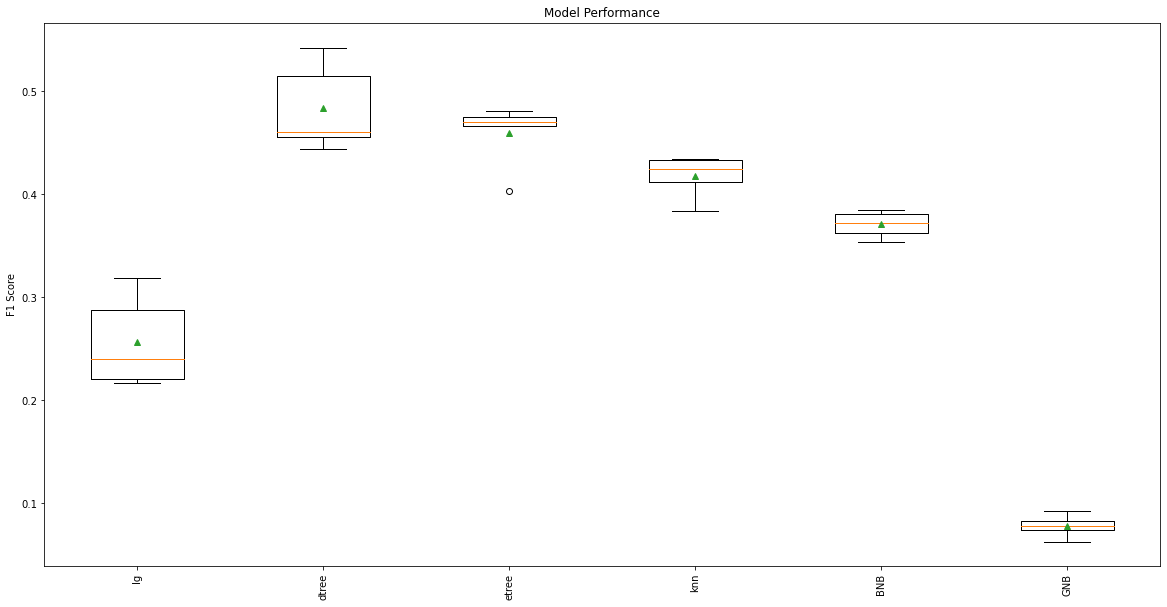

In [402]:
# Plotting the Output

plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.show()

From the above result, we choose dtree which gives us the best F1 Score as a base model...

In [403]:
# Advanced Models
def advanced_models():
    models=dict()
    models["rf"]=RandomForestClassifier()
    models["gbm"]=GradientBoostingClassifier()
    models["lgbm"]=LGBMClassifier()
    models["xgb"]=XGBClassifier()
    models["ada"]=AdaBoostClassifier()
    return models

In [404]:
# Evalution the model...
def eval_models(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=10)
    scores=cross_val_score(estimator=model,X=xlapse,y=ylapse,scoring="matthews_corrcoef",cv=cv,error_score="raise",n_jobs=-1)
    return scores


In [405]:
# Build Models
models=advanced_models()

# List for result and model names
result,names=list(),list()

for name,model in models.items():
    scores=eval_models(model)
    result.append(scores)
    names.append(name)
    print(">%s %.3f (%.3f)"%(name,np.mean(scores),np.std(scores)))

>rf 0.513 (0.008)
>gbm 0.443 (0.034)
>lgbm 0.544 (0.020)
>xgb 0.554 (0.030)
>ada 0.327 (0.044)


In [406]:
advanced_model_perf_lapse=pd.DataFrame({"Model Name":names,"F1 Score":np.mean(result,axis=1)})

In [407]:
advanced_model_perf_lapse

,Model Name,F1 Score
0,rf,0.513410
1,gbm,0.443355
2,lgbm,0.543571
3,xgb,0.553689
4,ada,0.327000


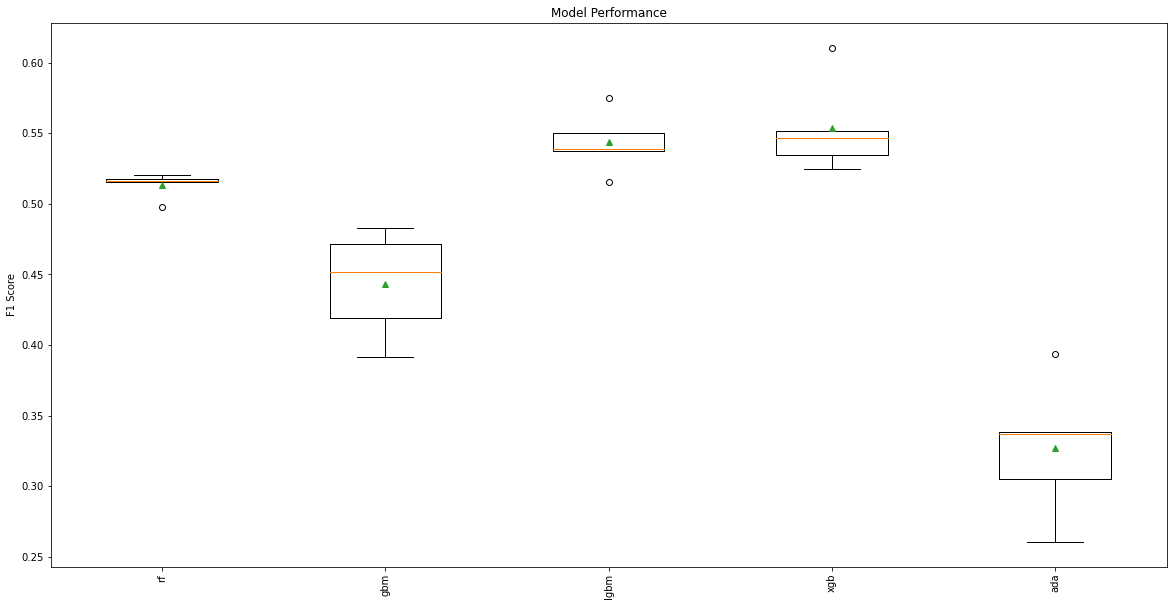

In [408]:
# Plotting the Output

plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel("F1 Score")
plt.title("Model Performance")
plt.show()

From the above result we choose xgbosst as our advanced model....

### Decision Tree

In [409]:
# Build Model
dt=DecisionTreeClassifier(random_state=10)
dt.fit(xtrain_lapse,ytrain_lapse)

# Prediction
finalpred=dt.predict(xtest_lapse)
finalpred_prob=dt.predict_proba(xtest_lapse)

# Metrics
print(classification_report(ytest_lapse,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_lapse,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_lapse,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_lapse,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_lapse,finalpred)}")

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3209
           1       0.52      0.55      0.53       169

    accuracy                           0.95      3378
   macro avg       0.75      0.76      0.75      3378
weighted avg       0.95      0.95      0.95      3378

F1 score = 0.5094577055692854
Accuracy score = 0.9520426287744227
AUC Score = 0.7660767331525056
Confusion Matric = 
[[3123   86]
 [  76   93]]


In [410]:
lapse_model_perf=pd.DataFrame(columns=["Model Name","F1 Score","Accuracy Score","AUC Score"])
lapse_model_perf

,Model Name,F1 Score,Accuracy Score,AUC Score


In [411]:
lapse_model_perf=lapse_model_perf.append({"Model Name":"Decision Tree","F1 Score":matthews_corrcoef(ytest_lapse,finalpred)
                                        ,"Accuracy Score":accuracy_score(ytest_lapse,finalpred),
                                         "AUC Score":roc_auc_score(ytest_lapse,finalpred_prob[:,1])},ignore_index=True)

In [412]:
lapse_model_perf

,Model Name,F1 Score,Accuracy Score,AUC Score
0,Decision Tree,0.509458,0.952043,0.766077


### XGBoost

In [413]:
# Build Model
xgb=XGBClassifier()
xgb.fit(xtrain_lapse,ytrain_lapse)

# Prediction
finalpred=xgb.predict(xtest_lapse)
finalpred_prob=xgb.predict_proba(xtest_lapse)

# Metrics
print(classification_report(ytest_lapse,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_lapse,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_lapse,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_lapse,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_lapse,finalpred)}")

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3209
           1       0.74      0.53      0.62       169

    accuracy                           0.97      3378
   macro avg       0.86      0.76      0.80      3378
weighted avg       0.96      0.97      0.96      3378

F1 score = 0.6105940760570759
Accuracy score = 0.9671403197158082
AUC Score = 0.9614942073052676
Confusion Matric = 
[[3177   32]
 [  79   90]]


In [414]:
lapse_model_perf=lapse_model_perf.append({"Model Name":"XGBoost","F1 Score":matthews_corrcoef(ytest_lapse,finalpred)
                                        ,"Accuracy Score":accuracy_score(ytest_lapse,finalpred),
                                         "AUC Score":roc_auc_score(ytest_lapse,finalpred_prob[:,1])},ignore_index=True)

In [415]:
lapse_model_perf

,Model Name,F1 Score,Accuracy Score,AUC Score
0,Decision Tree,0.509458,0.952043,0.766077
1,XGBoost,0.610594,0.967140,0.961494


In [416]:
# Build Model
rf=RandomForestClassifier()
rf.fit(xtrain_lapse,ytrain_lapse)

# Prediction
finalpred=rf.predict(xtest_lapse)
finalpred_prob=rf.predict_proba(xtest_lapse)

# Metrics
print(classification_report(ytest_lapse,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_lapse,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_lapse,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_lapse,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_lapse,finalpred)}")

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3209
           1       0.62      0.44      0.52       169

    accuracy                           0.96      3378
   macro avg       0.80      0.71      0.75      3378
weighted avg       0.95      0.96      0.96      3378

F1 score = 0.506164872708143
Accuracy score = 0.9588513913558319
AUC Score = 0.9375268521779536
Confusion Matric = 
[[3164   45]
 [  94   75]]


## Hyperparameter Tuning

### Decision Tree

In [417]:
# Build Model
dt=DecisionTreeClassifier(class_weight={0:0.1,1:0.9},criterion="gini",min_samples_leaf=5,
                          min_samples_split=2,max_depth=3)
dt.fit(xtrain_lapse,ytrain_lapse)

# Prediction
finalpred=dt.predict(xtest_lapse)
finalpred_prob=dt.predict_proba(xtest_lapse)

# Metrics
print(classification_report(ytest_lapse,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_lapse,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_lapse,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_lapse,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_lapse,finalpred)}")

              precision    recall  f1-score   support

           0       1.00      0.83      0.90      3209
           1       0.22      0.93      0.36       169

    accuracy                           0.83      3378
   macro avg       0.61      0.88      0.63      3378
weighted avg       0.96      0.83      0.88      3378

F1 score = 0.4063184075963949
Accuracy score = 0.8318531675547661
AUC Score = 0.9097978872291503
Confusion Matric = 
[[2652  557]
 [  11  158]]


In [418]:
lapse_model_perf=lapse_model_perf.append({"Model Name":"Decision Tree Tuned","F1 Score":matthews_corrcoef(ytest_lapse,finalpred)
                                        ,"Accuracy Score":accuracy_score(ytest_lapse,finalpred),
                                         "AUC Score":roc_auc_score(ytest_lapse,finalpred_prob[:,1])},ignore_index=True)
lapse_model_perf

,Model Name,F1 Score,Accuracy Score,AUC Score
0,Decision Tree,0.509458,0.952043,0.766077
1,XGBoost,0.610594,0.967140,0.961494
2,Decision Tree Tuned,0.406318,0.831853,0.909798


### Xgboost

In [419]:
# Build Model
xgb=XGBClassifier(learning_rate=1,n_estimators=1000,max_depth=2)
xgb.fit(xtrain_lapse,ytrain_lapse)

# Prediction
finalpred=xgb.predict(xtest_lapse)
finalpred_prob=xgb.predict_proba(xtest_lapse)

# Metrics
print(classification_report(ytest_lapse,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_lapse,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_lapse,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_lapse,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_lapse,finalpred)}")

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3209
           1       0.62      0.47      0.53       169

    accuracy                           0.96      3378
   macro avg       0.80      0.73      0.76      3378
weighted avg       0.95      0.96      0.96      3378

F1 score = 0.518602054049474
Accuracy score = 0.9591474245115453
AUC Score = 0.9451708489990245
Confusion Matric = 
[[3161   48]
 [  90   79]]


In [420]:
lapse_model_perf=lapse_model_perf.append({"Model Name":"XGBoost Tuned","F1 Score":matthews_corrcoef(ytest_lapse,finalpred)
                                        ,"Accuracy Score":accuracy_score(ytest_lapse,finalpred),
                                         "AUC Score":roc_auc_score(ytest_lapse,finalpred_prob[:,1])},ignore_index=True)
lapse_model_perf

,Model Name,F1 Score,Accuracy Score,AUC Score
0,Decision Tree,0.509458,0.952043,0.766077
1,XGBoost,0.610594,0.967140,0.961494
2,Decision Tree Tuned,0.406318,0.831853,0.909798
3,XGBoost Tuned,0.518602,0.959147,0.945171


### PCA

In [328]:
from sklearn.decomposition import PCA

In [329]:
mypca=PCA(n_components=0.99)
pca=mypca.fit_transform(xlapse)
pca_df=pd.DataFrame(pca)
pca_df.head(2)

,0,1,2,3
0,-0.089867,-14.039609,2.706708,1.173425
1,13.907859,0.687318,-1.079770,1.139073


In [330]:
# Split The Data
xtrain_lapse,xtest_lapse,ytrain_lapse,ytest_lapse=train_test_split(pca_df,ylapse,test_size=0.2,random_state=10)

### Decision Tree PCA

In [331]:
# Build Model
dt=DecisionTreeClassifier(class_weight={0:0.1,1:0.9},criterion="gini",min_samples_leaf=5,
                          min_samples_split=2,max_depth=3)
dt.fit(xtrain_lapse,ytrain_lapse)

# Prediction
finalpred=dt.predict(xtest_lapse)
finalpred_prob=dt.predict_proba(xtest_lapse)

# Metrics
print(classification_report(ytest_lapse,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_lapse,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_lapse,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_lapse,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_lapse,finalpred)}")

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      3205
           1       0.24      0.69      0.35       173

    accuracy                           0.87      3378
   macro avg       0.61      0.78      0.64      3378
weighted avg       0.94      0.87      0.90      3378

F1 score = 0.3502988951482811
Accuracy score = 0.8694493783303731
AUC Score = 0.8747125607567656
Confusion Matric = 
[[2818  387]
 [  54  119]]


### Xgboost PCA

In [332]:
# Build Model
xgb=XGBClassifier(learning_rate=1,n_estimators=1000,max_depth=2)
xgb.fit(xtrain_lapse,ytrain_lapse)

# Prediction
finalpred=xgb.predict(xtest_lapse)
finalpred_prob=xgb.predict_proba(xtest_lapse)

# Metrics
print(classification_report(ytest_lapse,finalpred))
print(f"F1 score = {matthews_corrcoef(ytest_lapse,finalpred)}")
print(f"Accuracy score = {accuracy_score(ytest_lapse,finalpred)}")
print(f"AUC Score = {roc_auc_score(ytest_lapse,finalpred_prob[:,1])}")
print(f"Confusion Matric = \n{confusion_matrix(ytest_lapse,finalpred)}")

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3205
           1       0.50      0.36      0.42       173

    accuracy                           0.95      3378
   macro avg       0.73      0.67      0.70      3378
weighted avg       0.94      0.95      0.94      3378

F1 score = 0.3974332526651968
Accuracy score = 0.9487862640615748
AUC Score = 0.9021994174564671
Confusion Matric = 
[[3143   62]
 [ 111   62]]


**Using PCA Data, the model has not imporved therefore we will not be using it...**

In [333]:
lapse_model_perf

,Model Name,F1 Score,Accuracy Score,AUC Score
0,Decision Tree,0.509458,0.952043,0.766077
1,XGBoost,0.610594,0.967140,0.961494
2,Decision Tree Tuned,0.406318,0.831853,0.909798
3,XGBoost Tuned,0.518602,0.959147,0.945171
